# 匹配滤波+评分

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import ysy_plot_utils as ypu
import ysy_gw_data_utils as ygdu

import json

GW150914: For detector H1, maximum at 1126259462.4395 with SNR = 18.6, D_eff = 814.45, horizon = 1889.6 Mpc


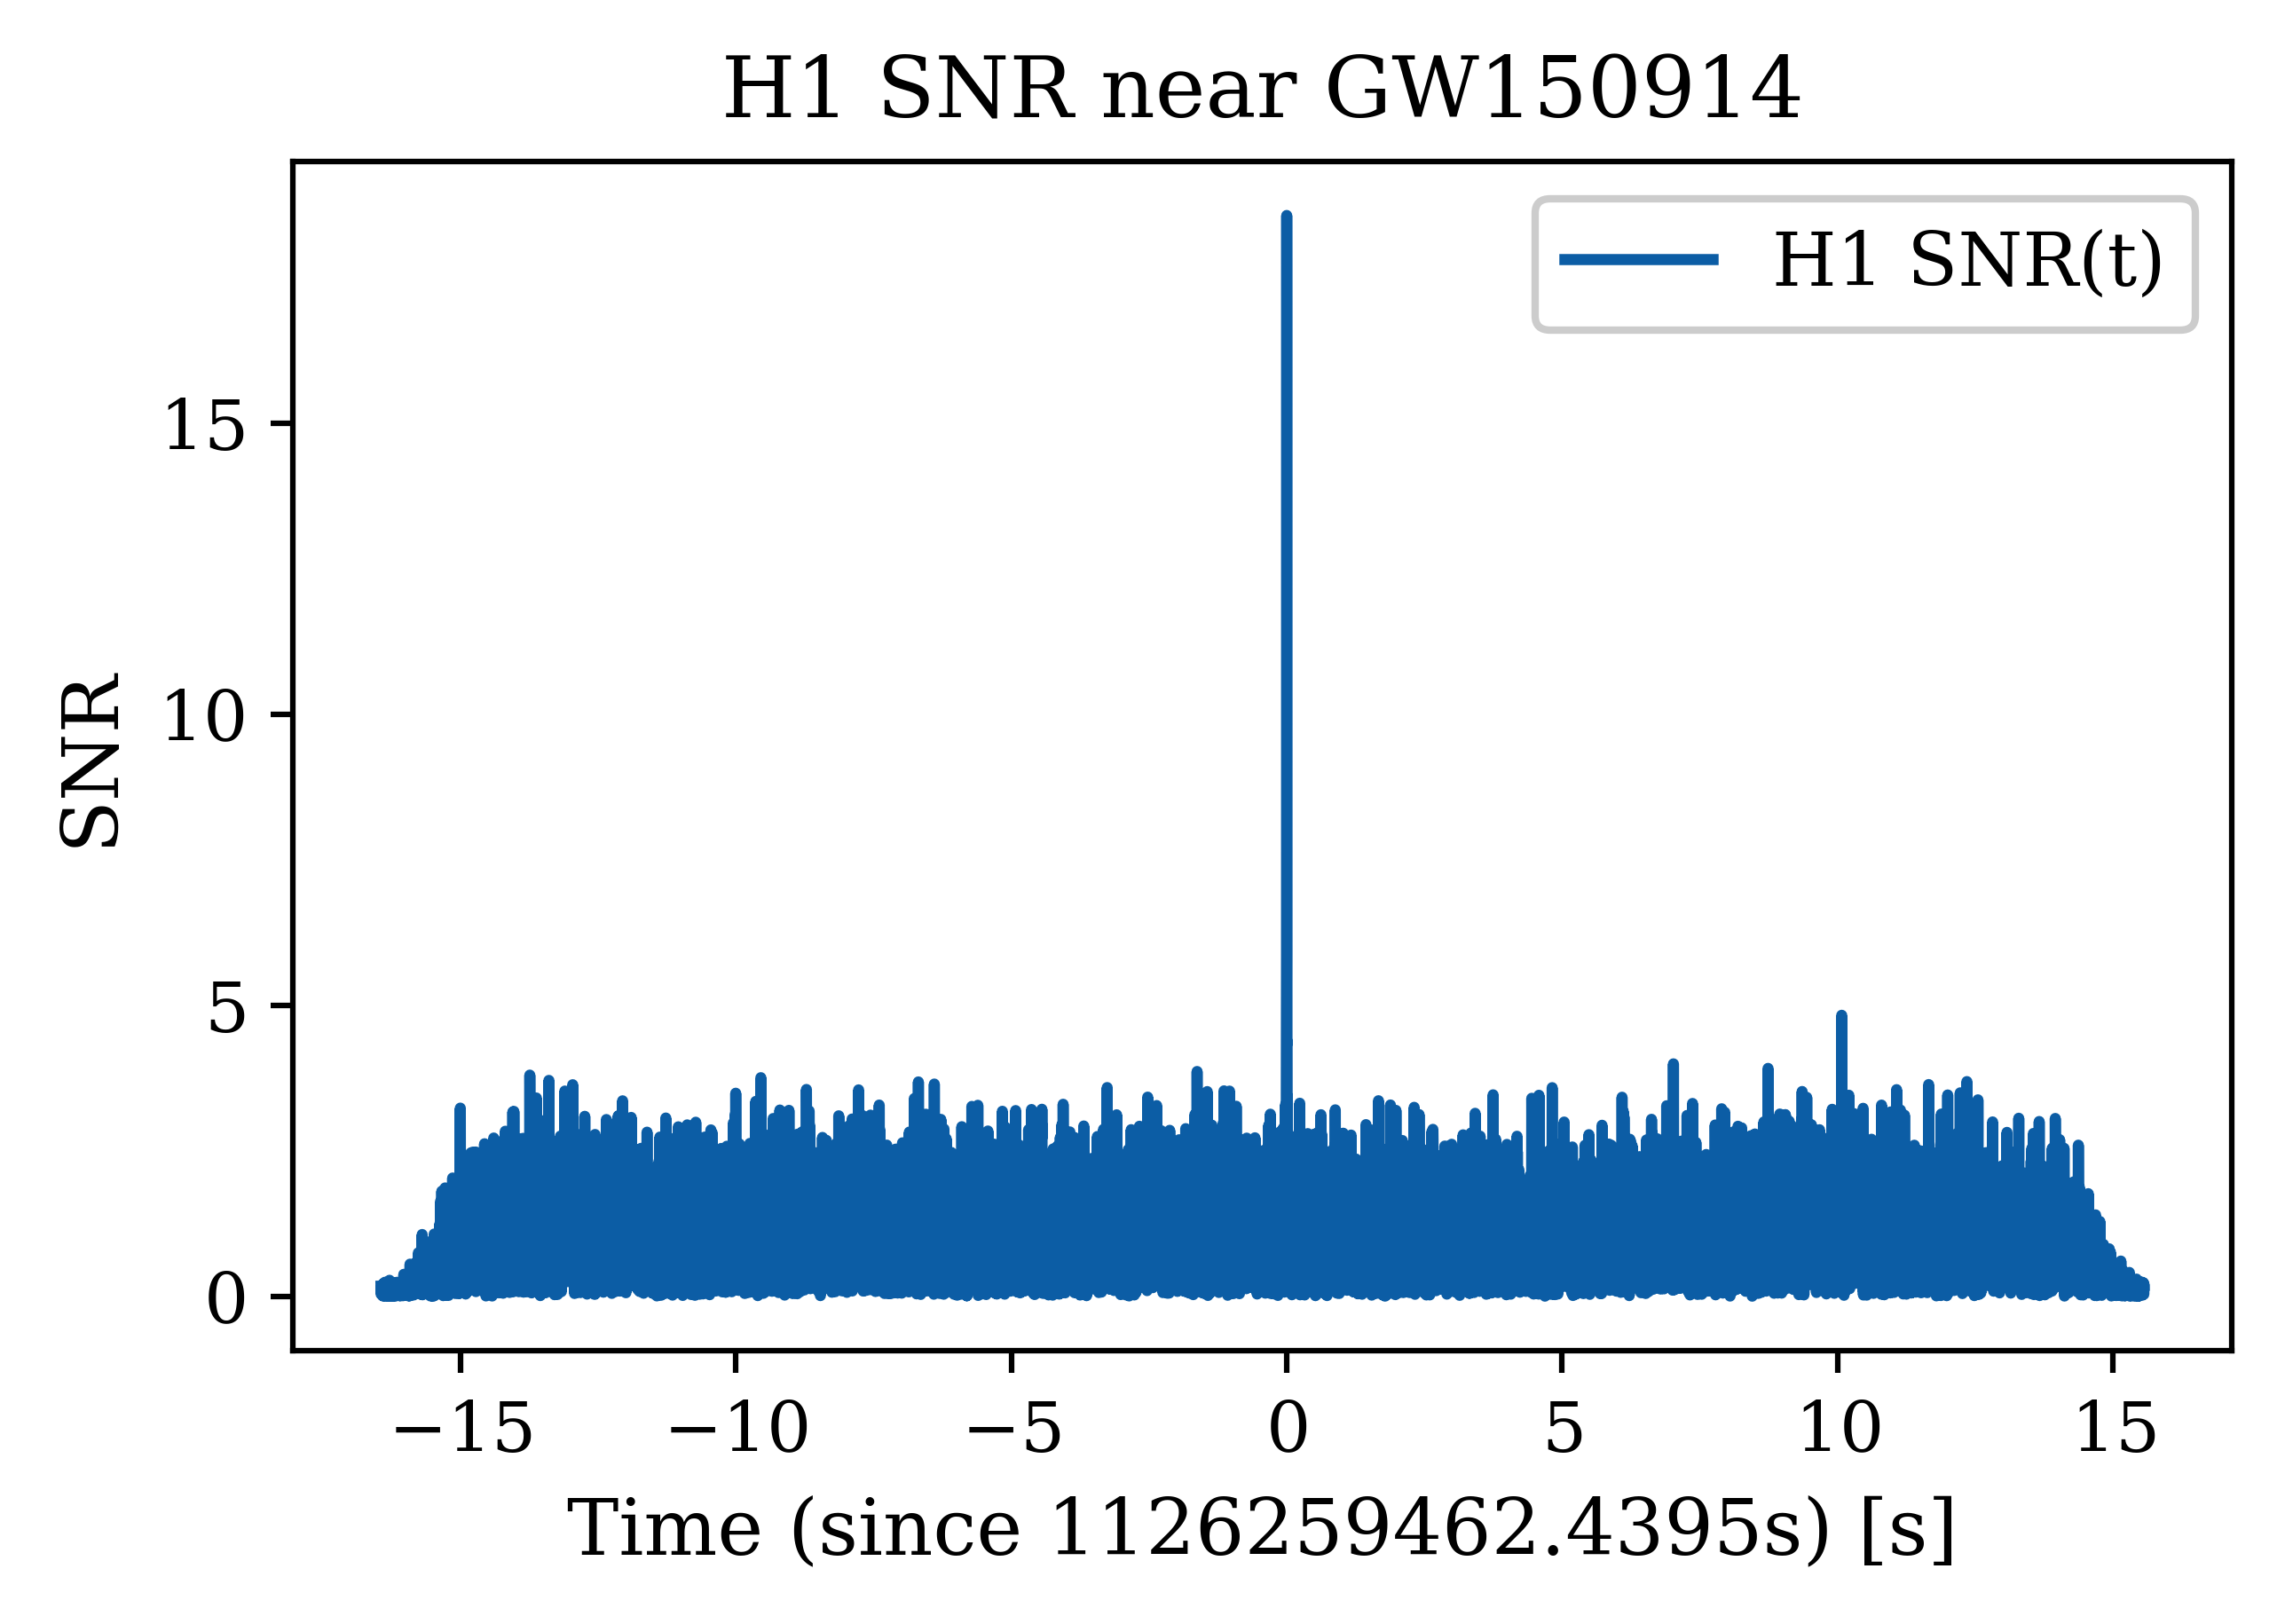

<Figure size 1410x870 with 0 Axes>

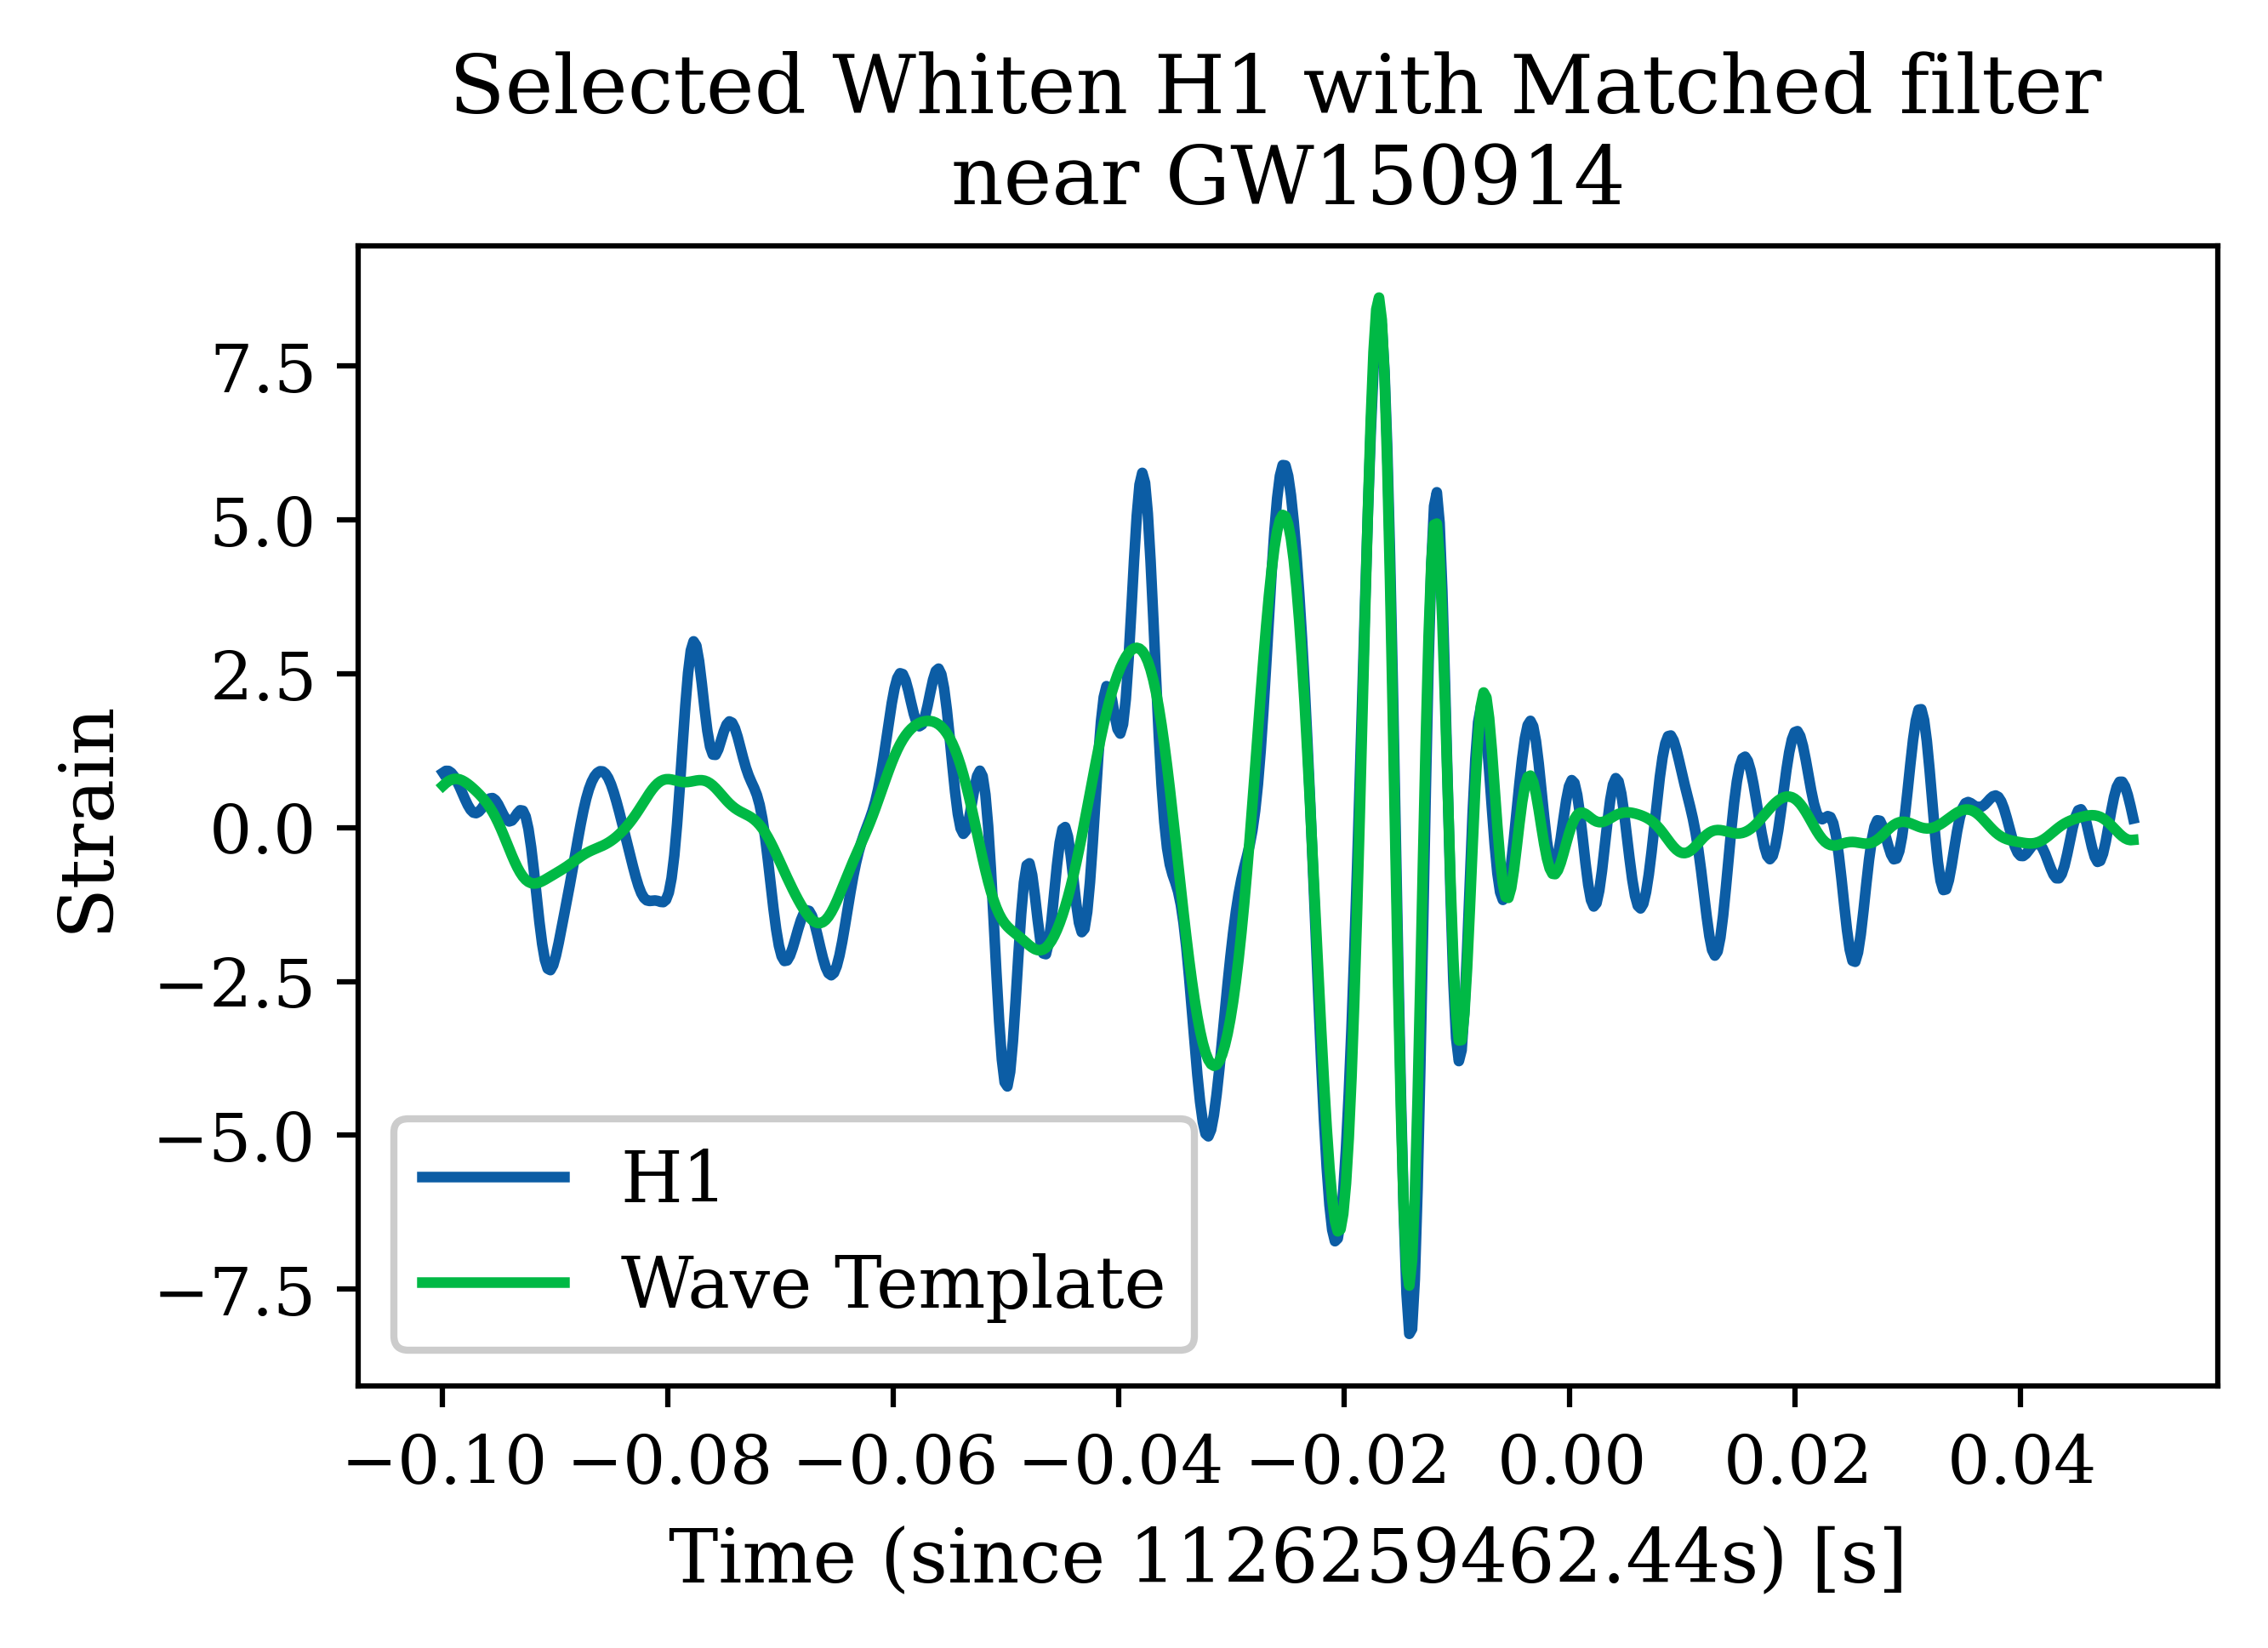

GW150914: For detector L1, maximum at 1126259462.4324 with SNR = 13.2, D_eff = 999.78, horizon = 1650.6 Mpc


<Figure size 1410x870 with 0 Axes>

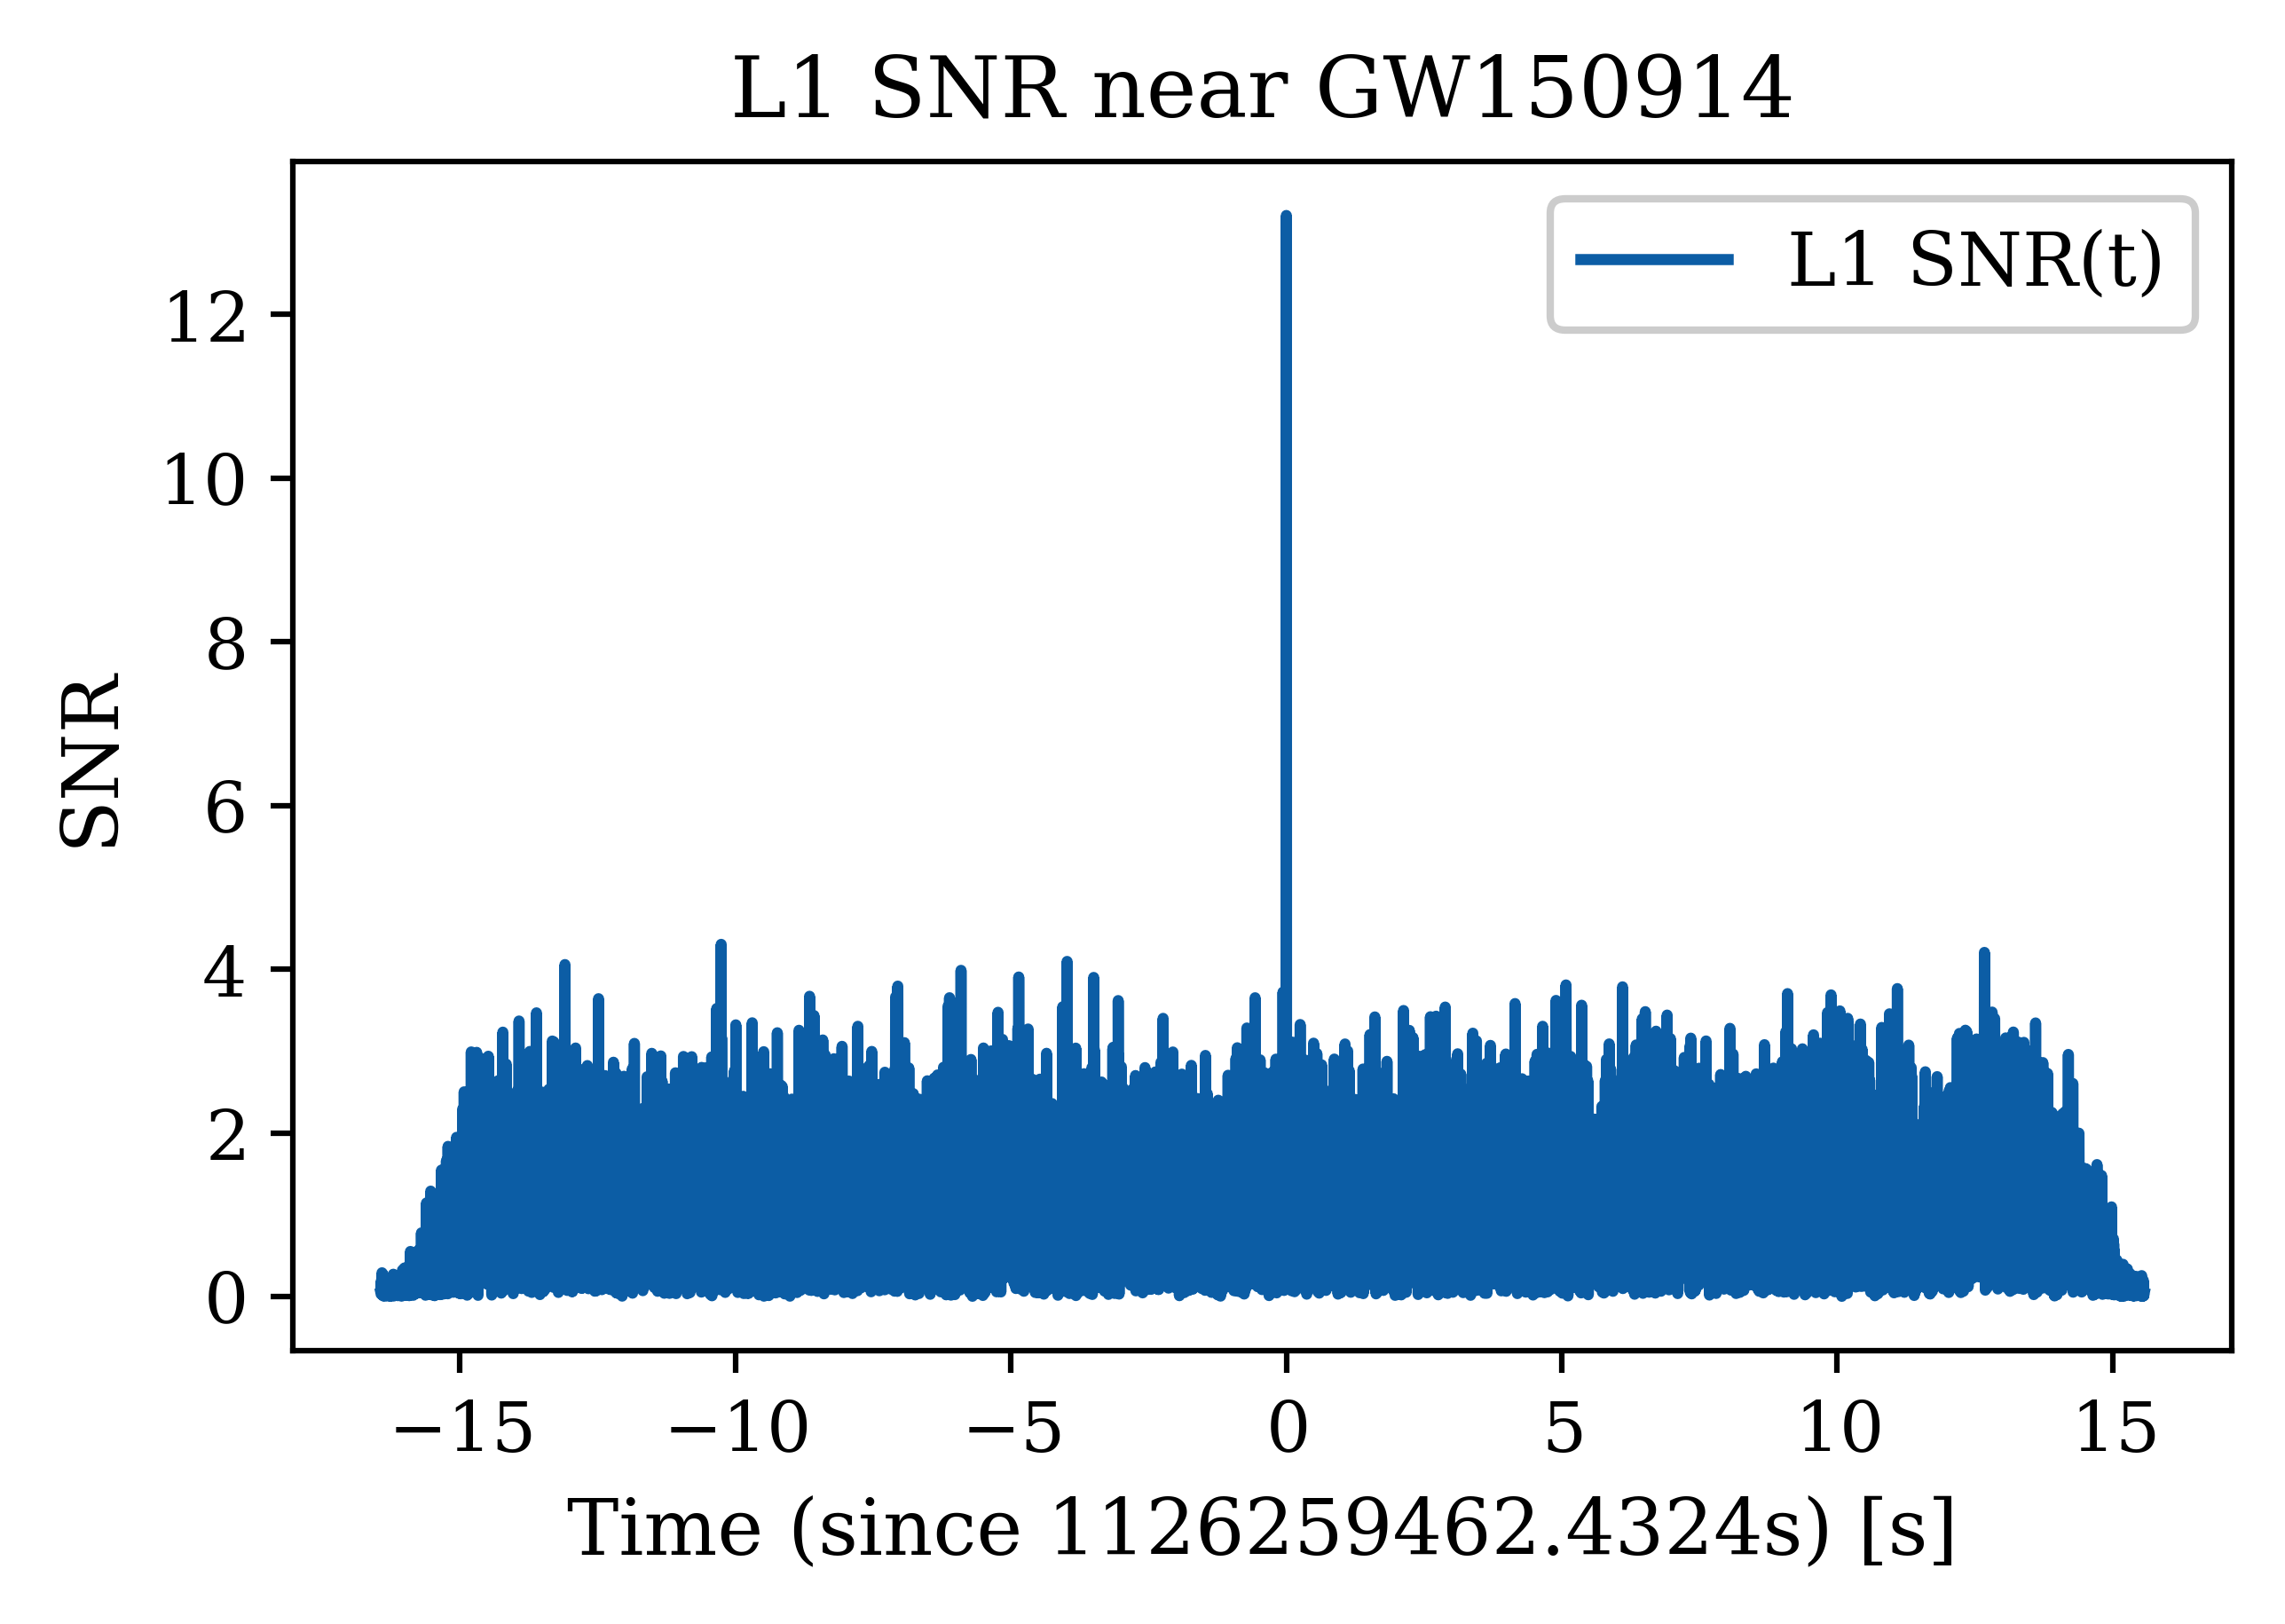

<Figure size 1410x870 with 0 Axes>

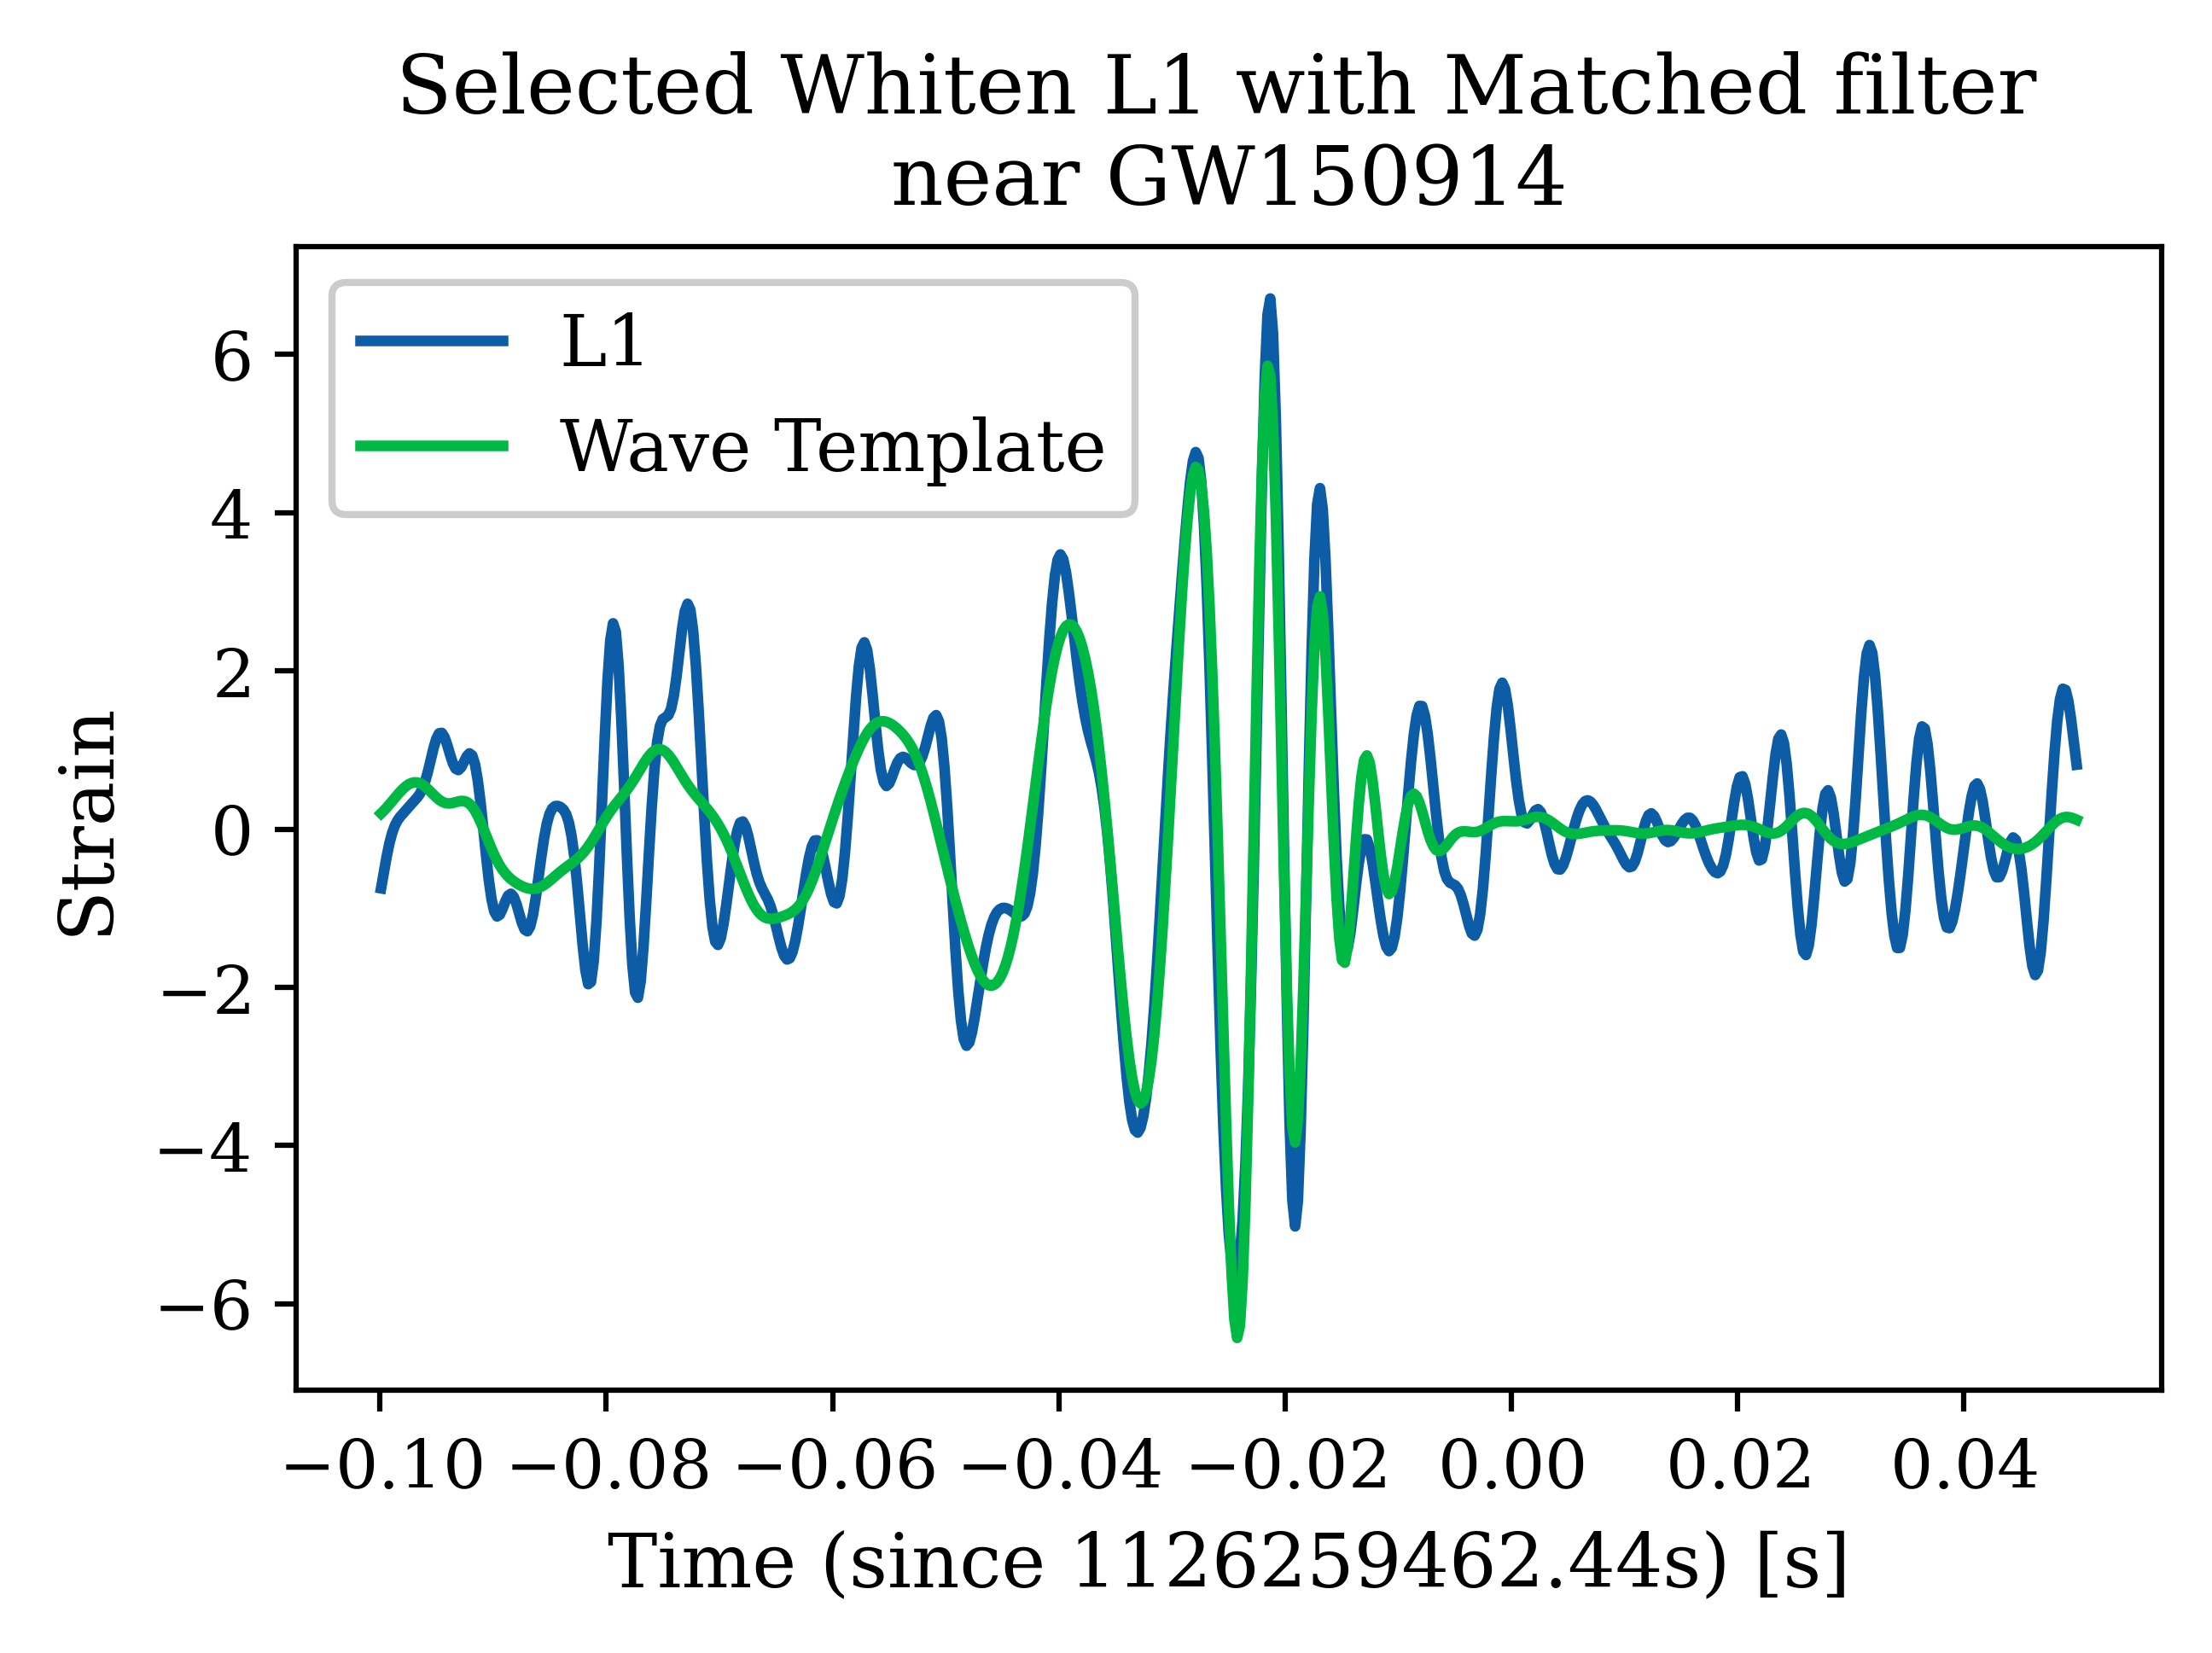

GW150914: The score is 0.462660.
Time score: 1.000000
cSNR score: 0.302988
Params score: 0.261329
LVT151012: For detector H1, maximum at 1128678900.4421 with SNR = 6.3, D_eff = 1577.91, horizon = 1241.5 Mpc


<Figure size 1410x870 with 0 Axes>

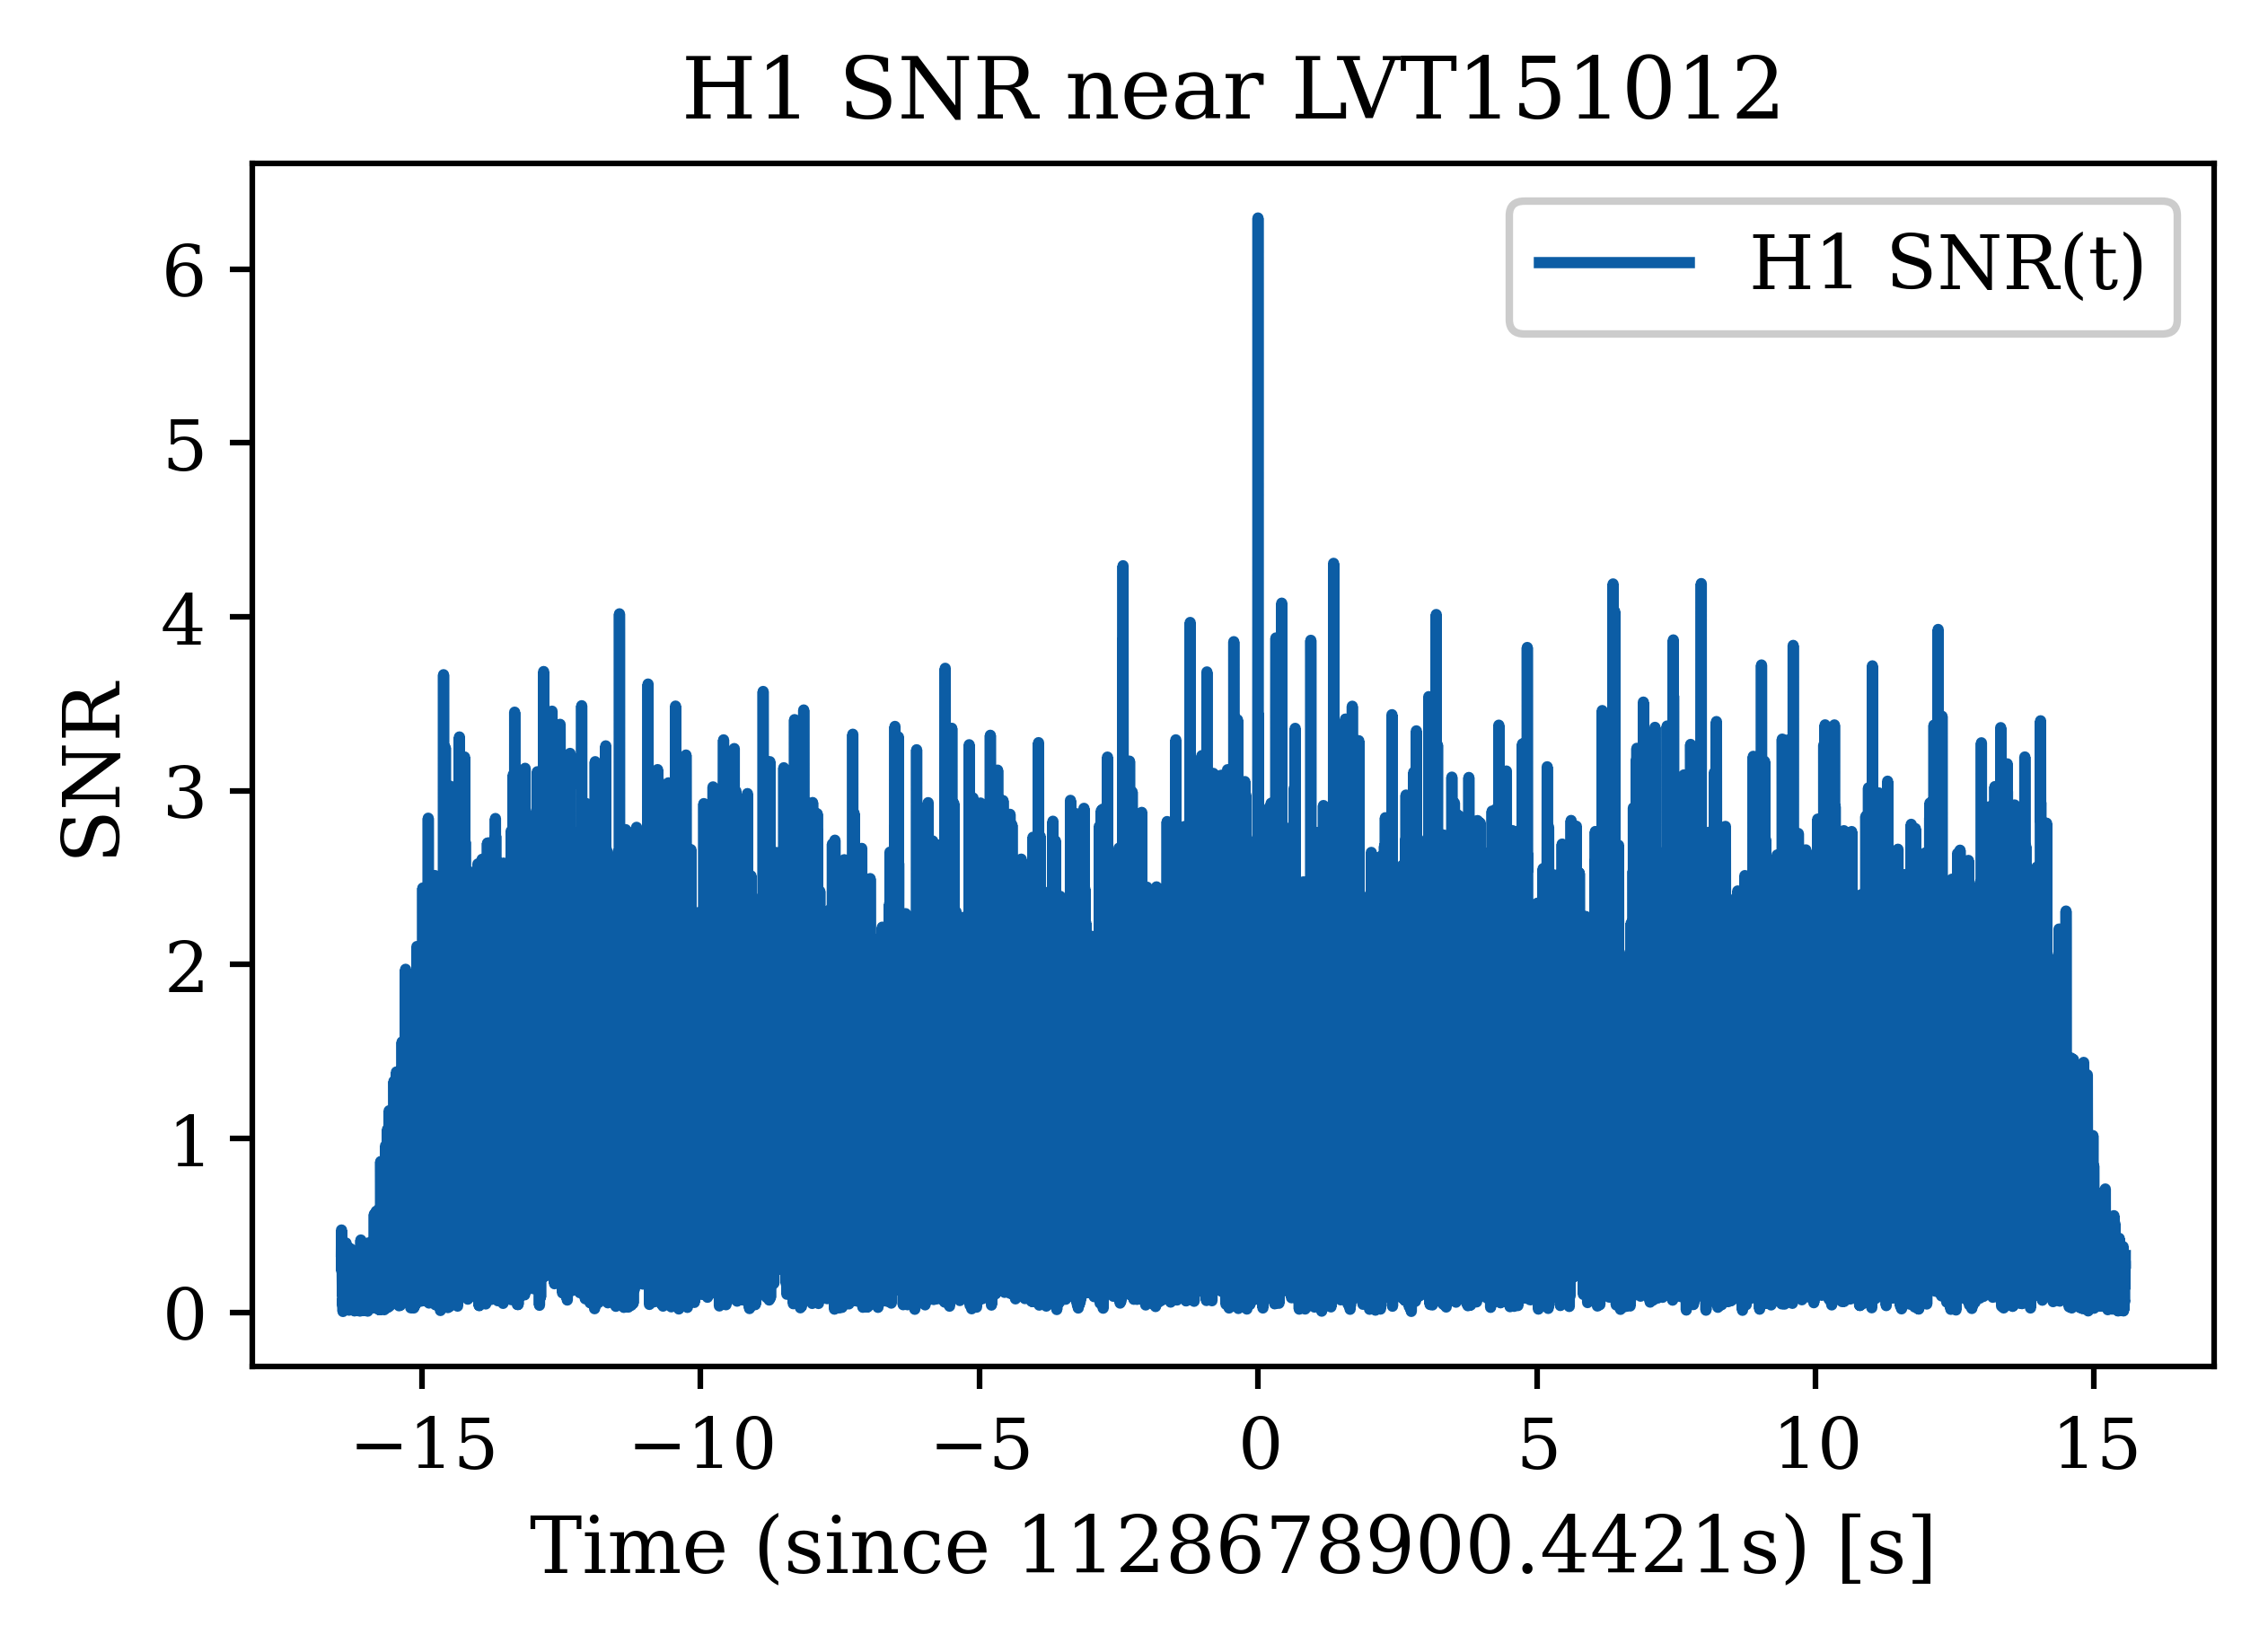

<Figure size 1410x870 with 0 Axes>

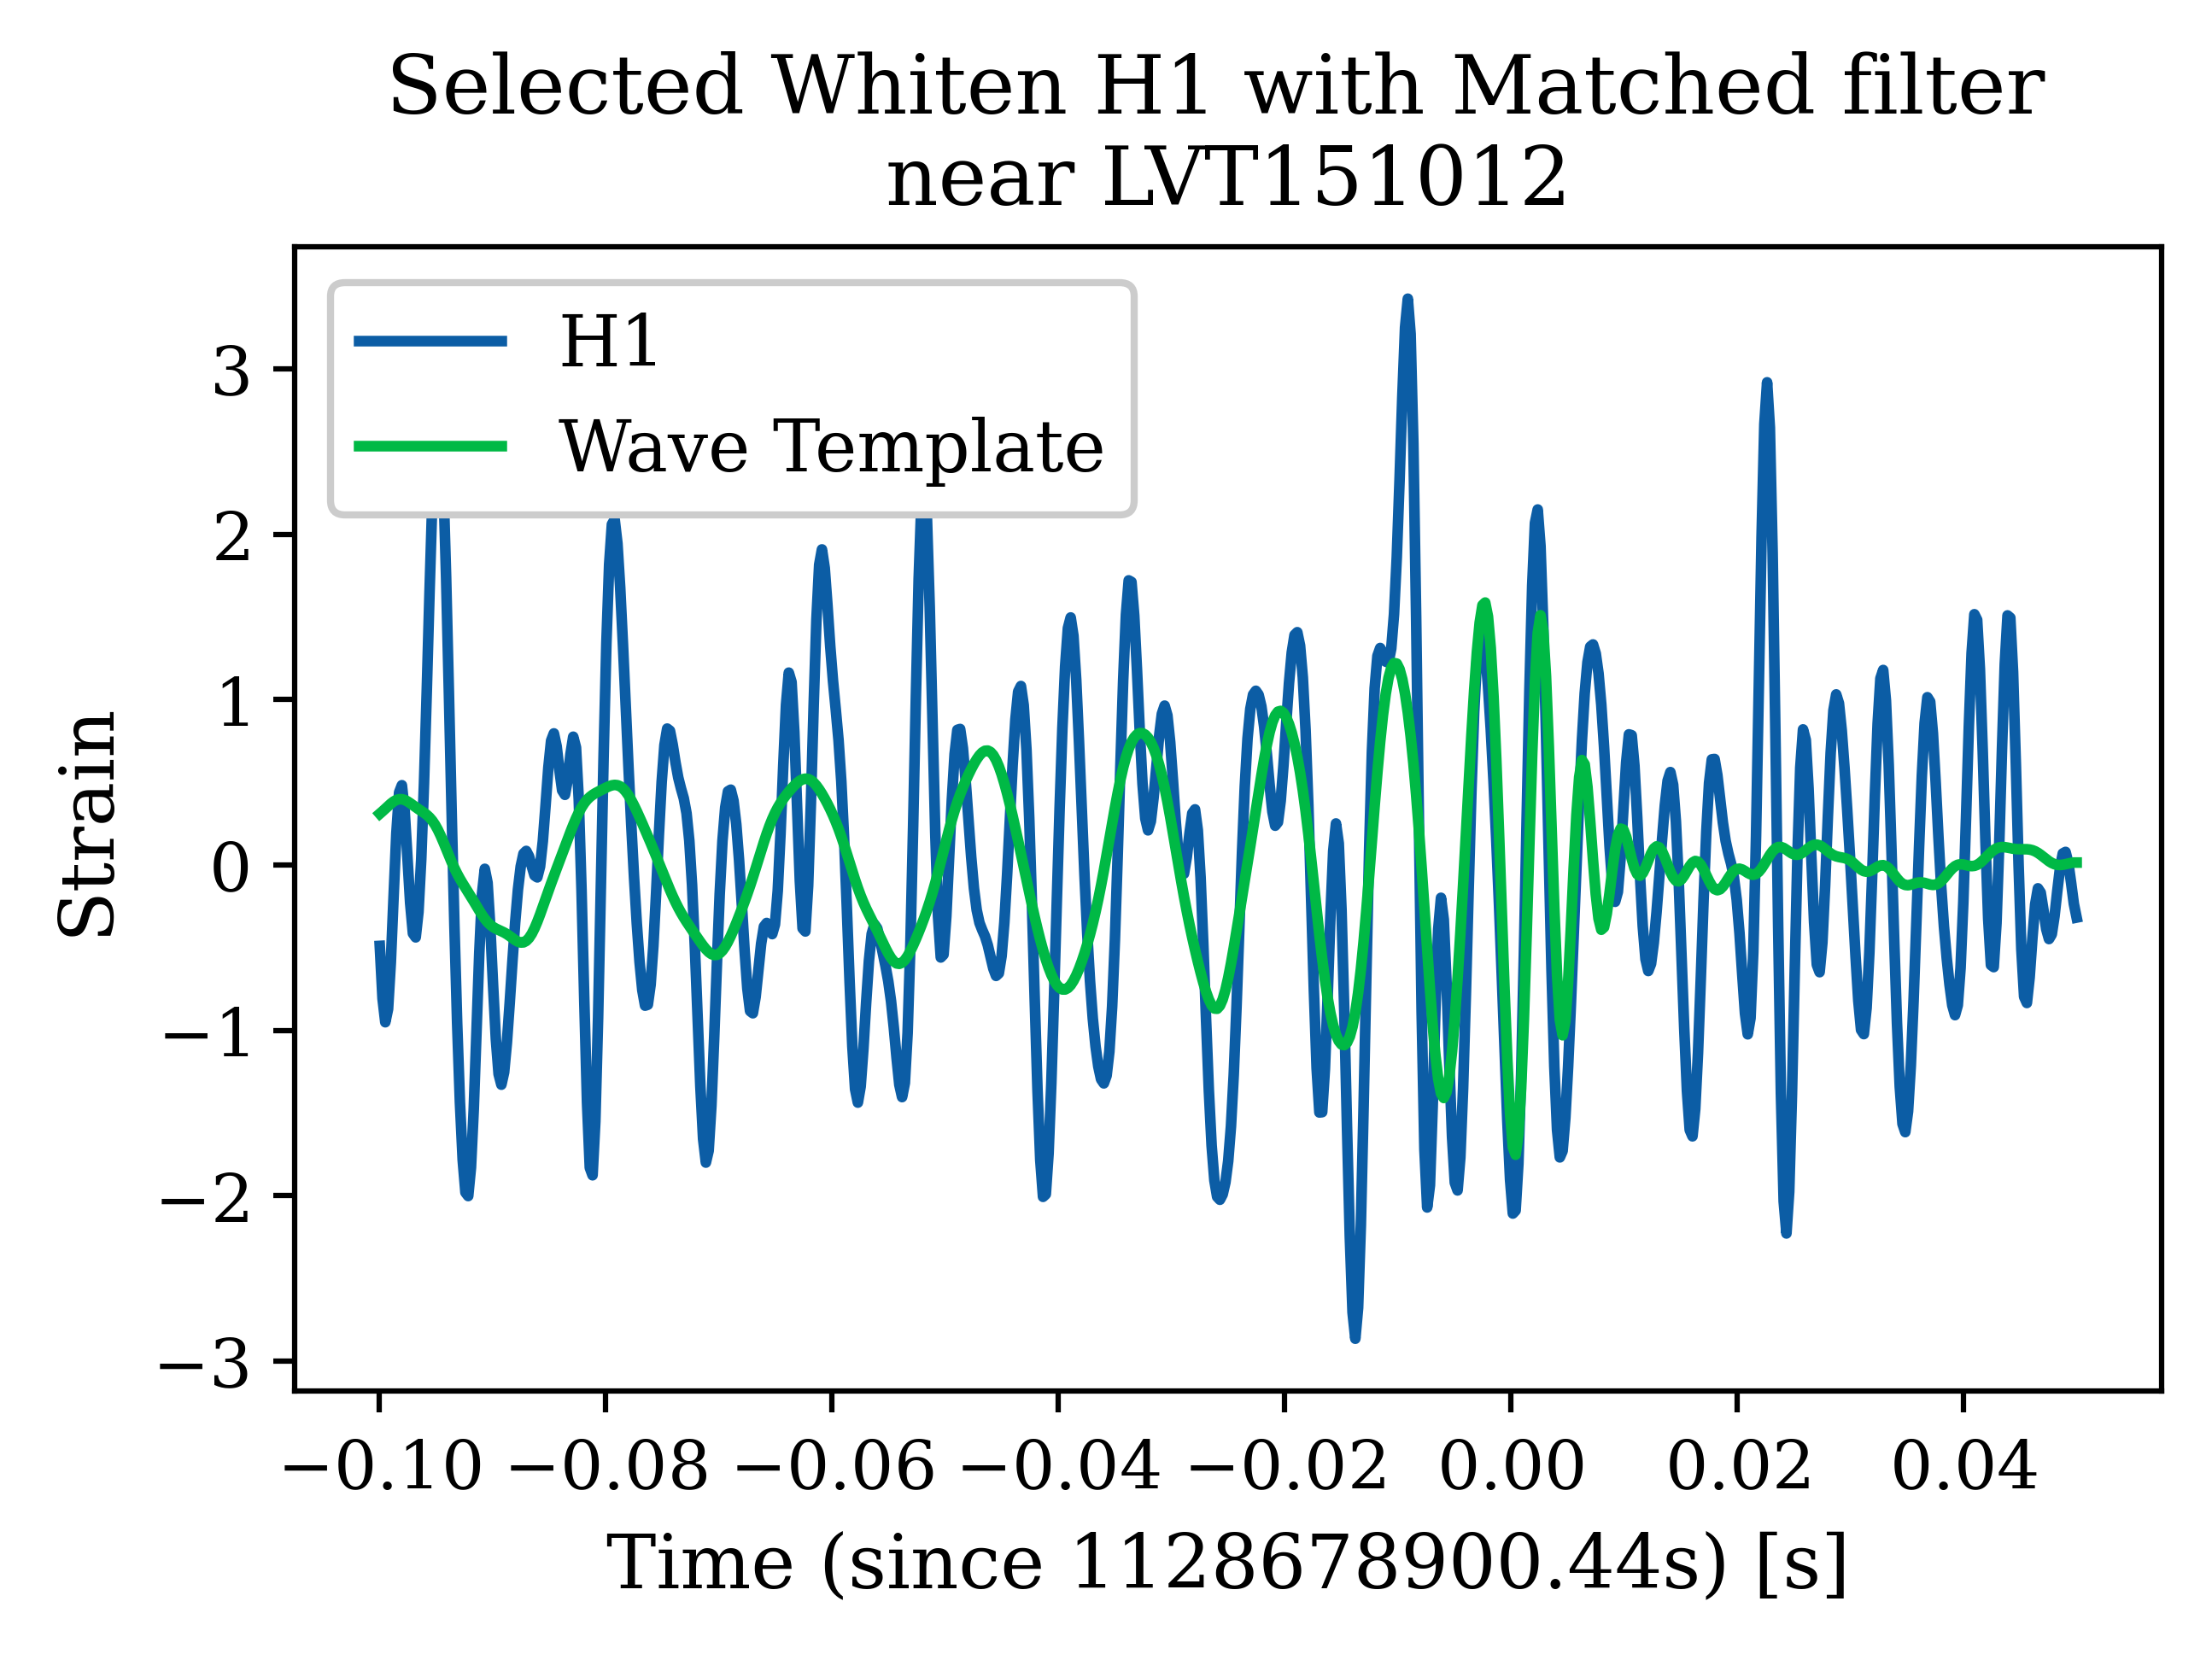

LVT151012: For detector L1, maximum at 1128678900.4429 with SNR = 6.1, D_eff = 1494.11, horizon = 1137.7 Mpc


<Figure size 1410x870 with 0 Axes>

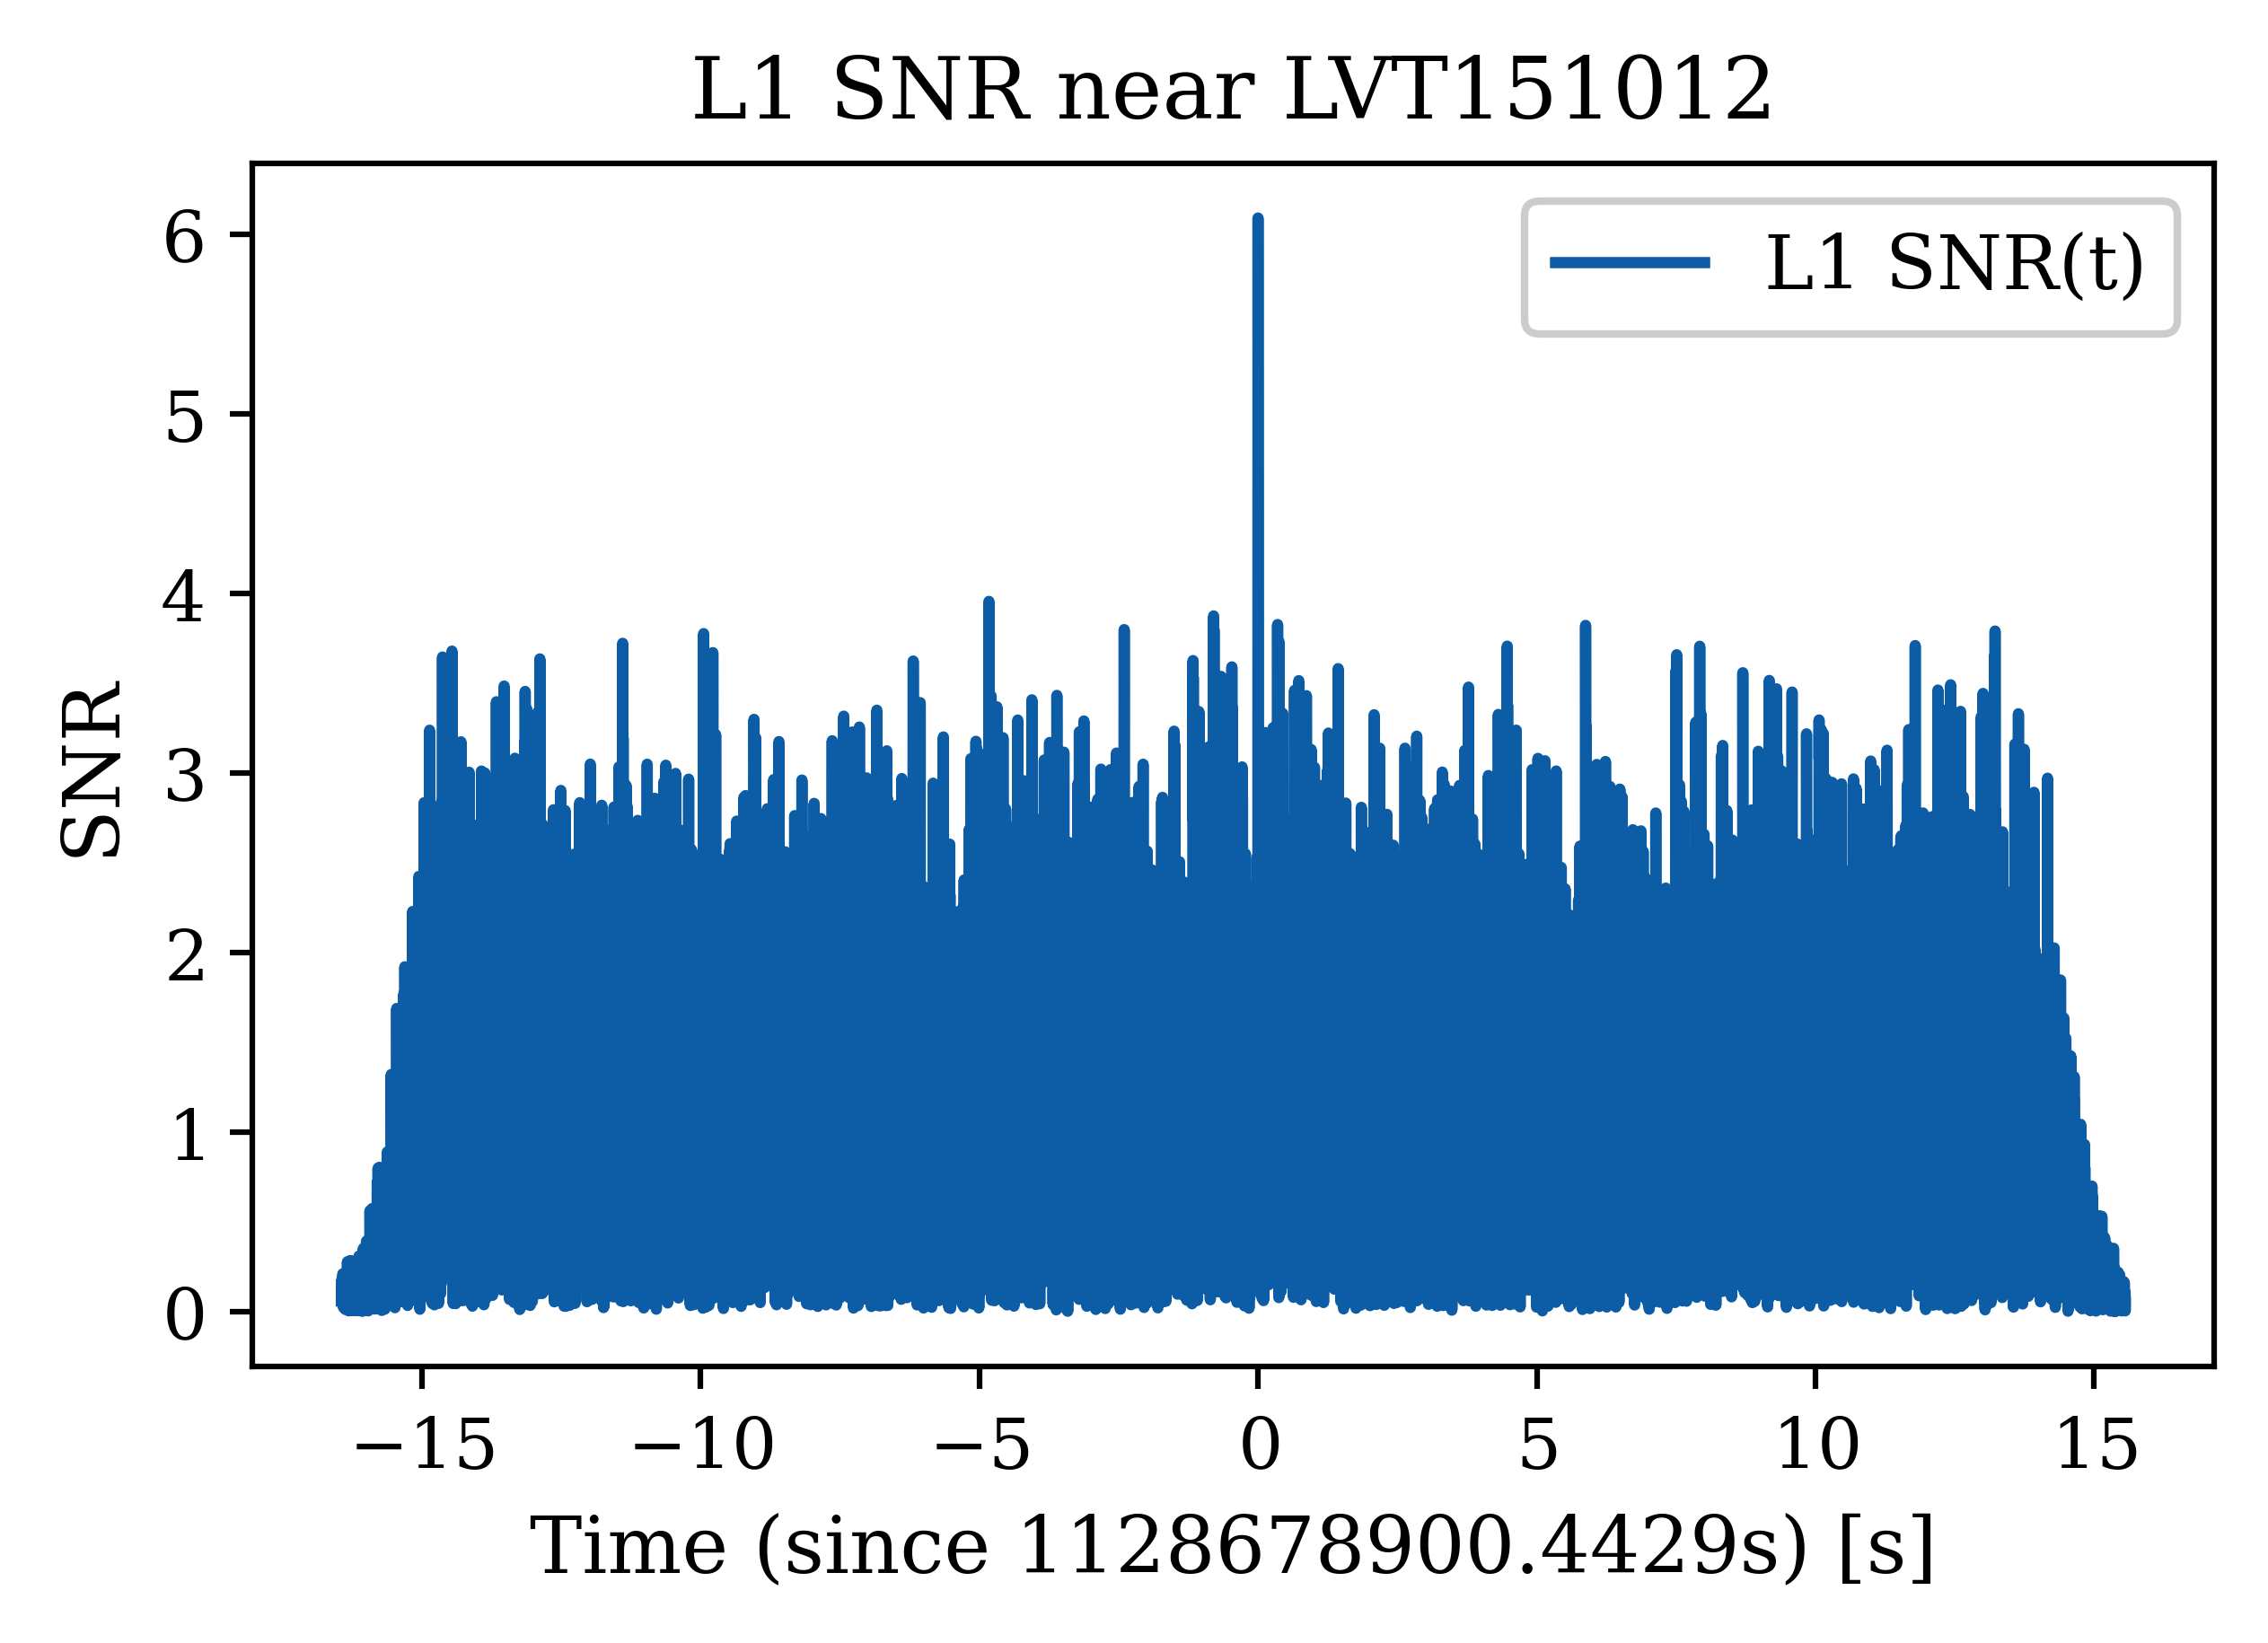

<Figure size 1410x870 with 0 Axes>

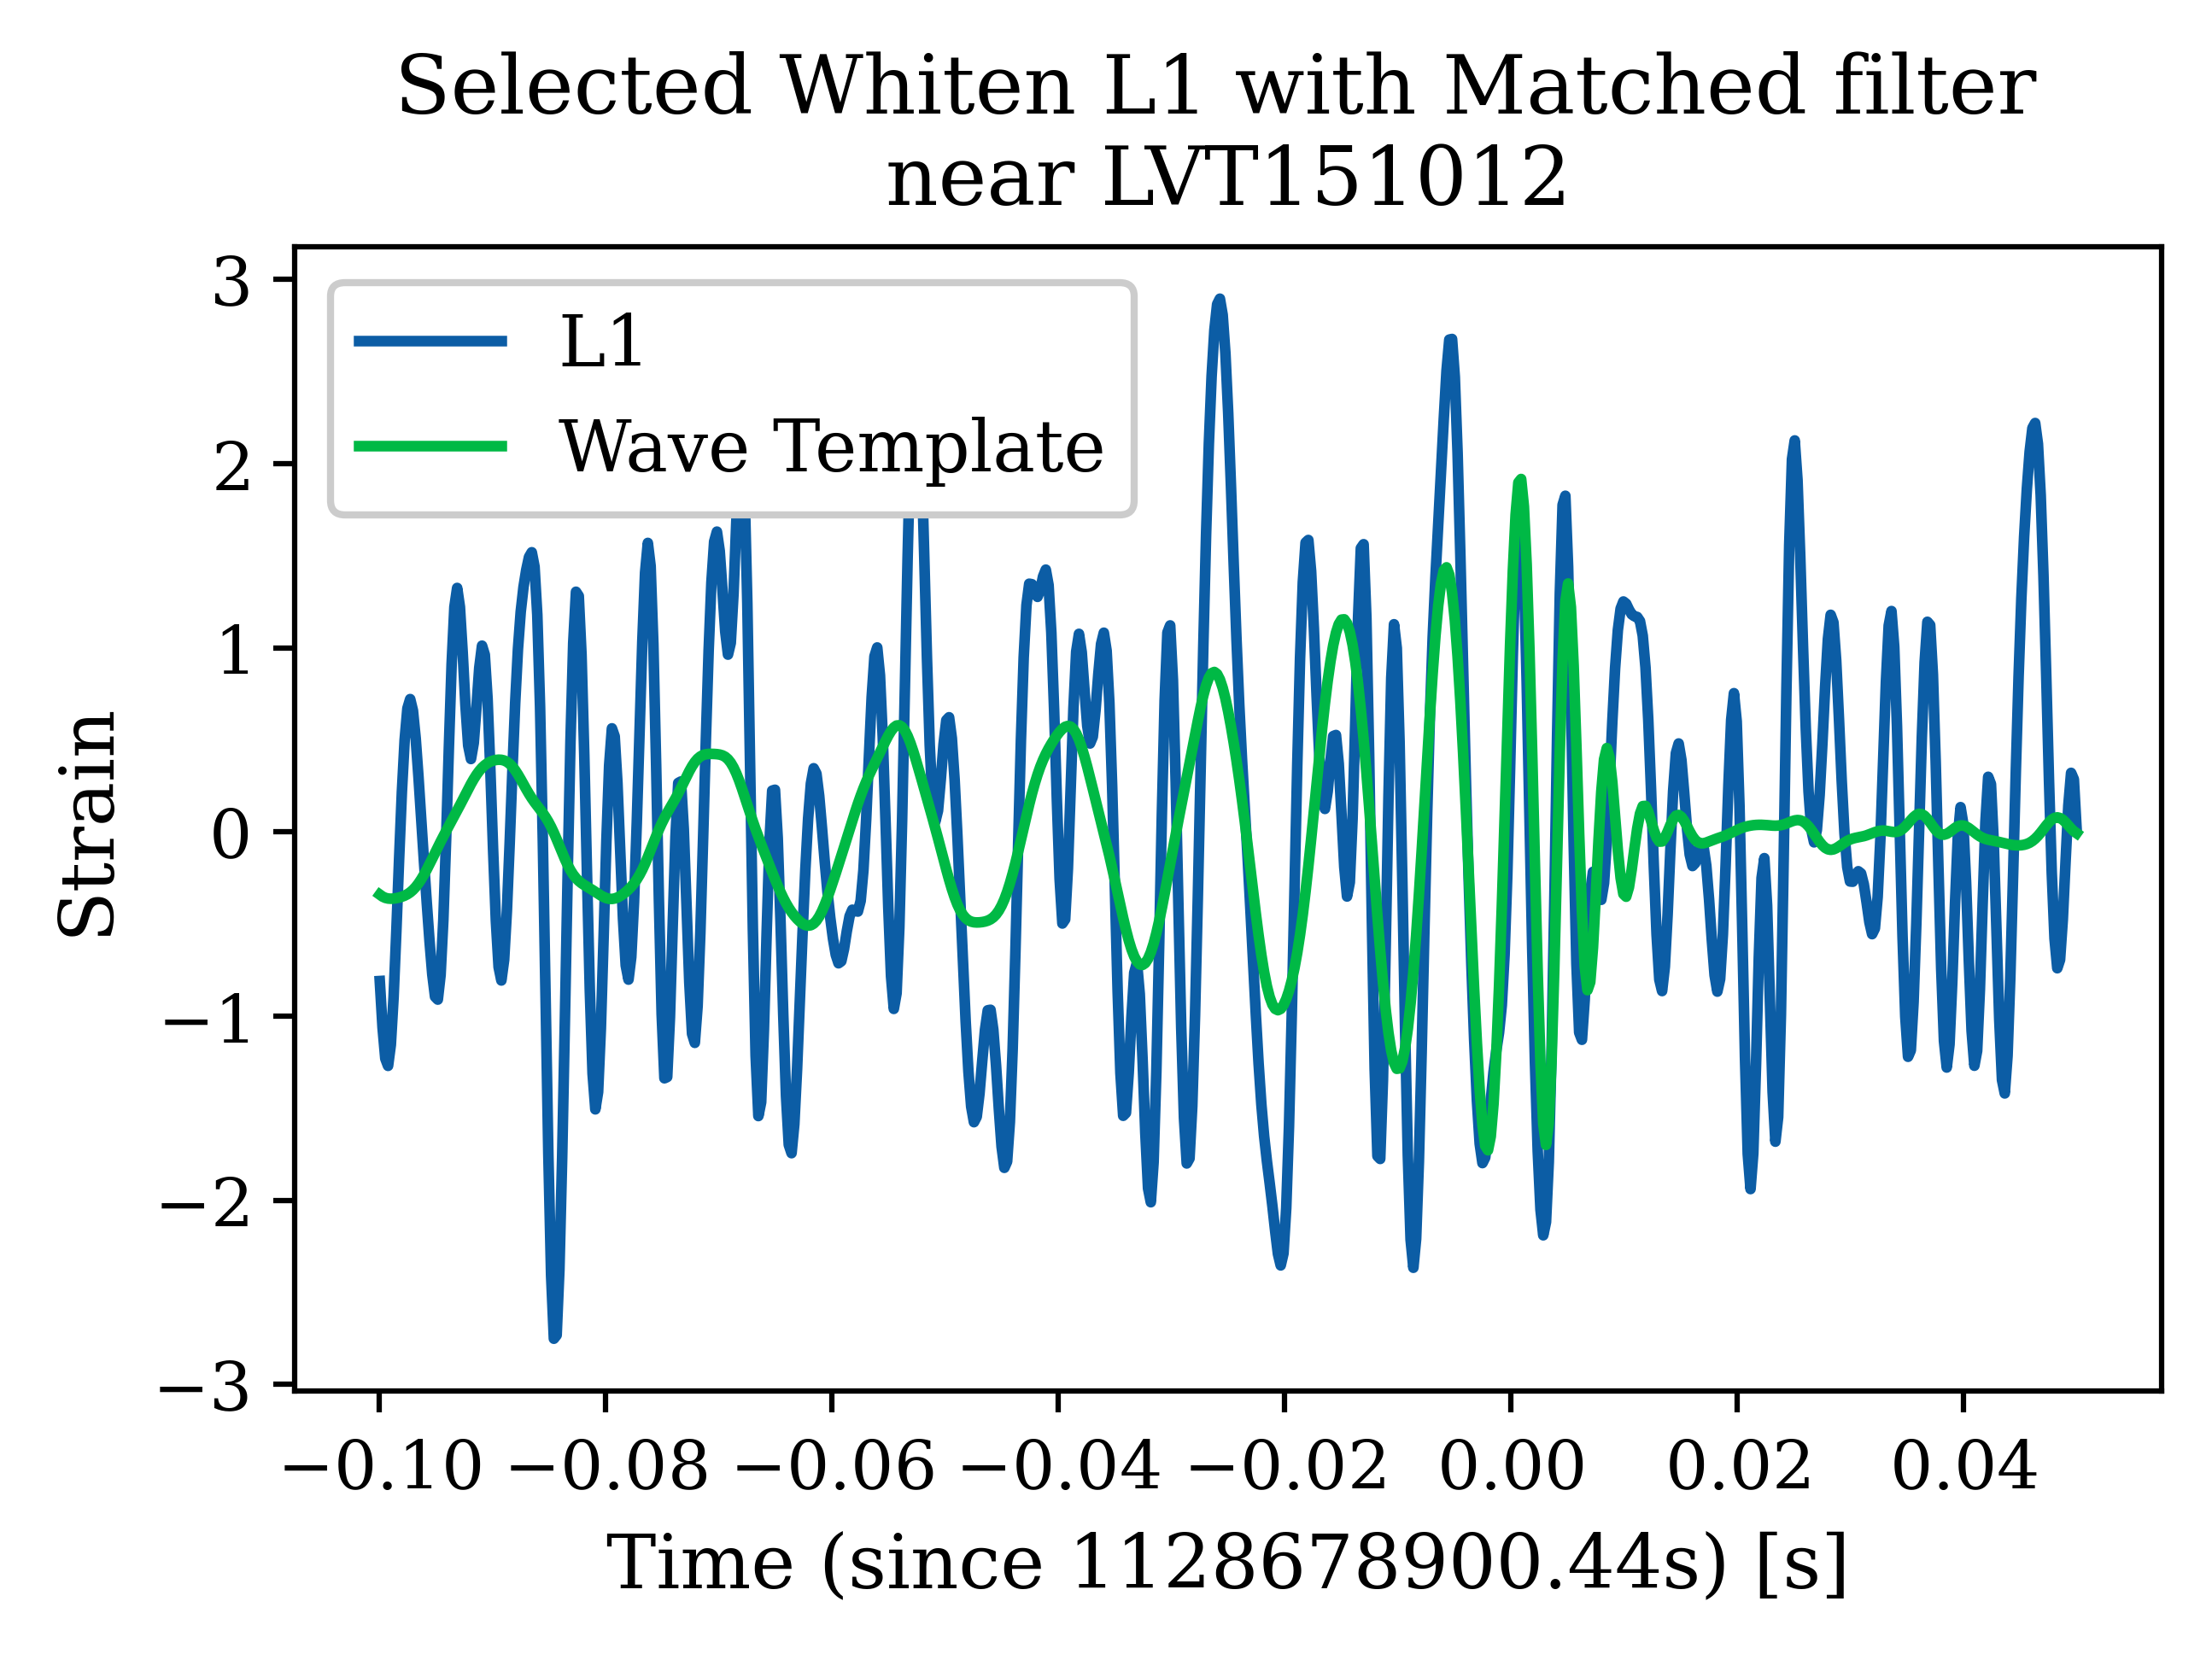

LVT151012: The score is 0.511509.
Time score: 1.000000
cSNR score: 0.217914
Params score: 0.498125
GW151226: For detector H1, maximum at 1135136350.6477 with SNR = 9.6, D_eff = 714.72, horizon = 858.5 Mpc


<Figure size 1410x870 with 0 Axes>

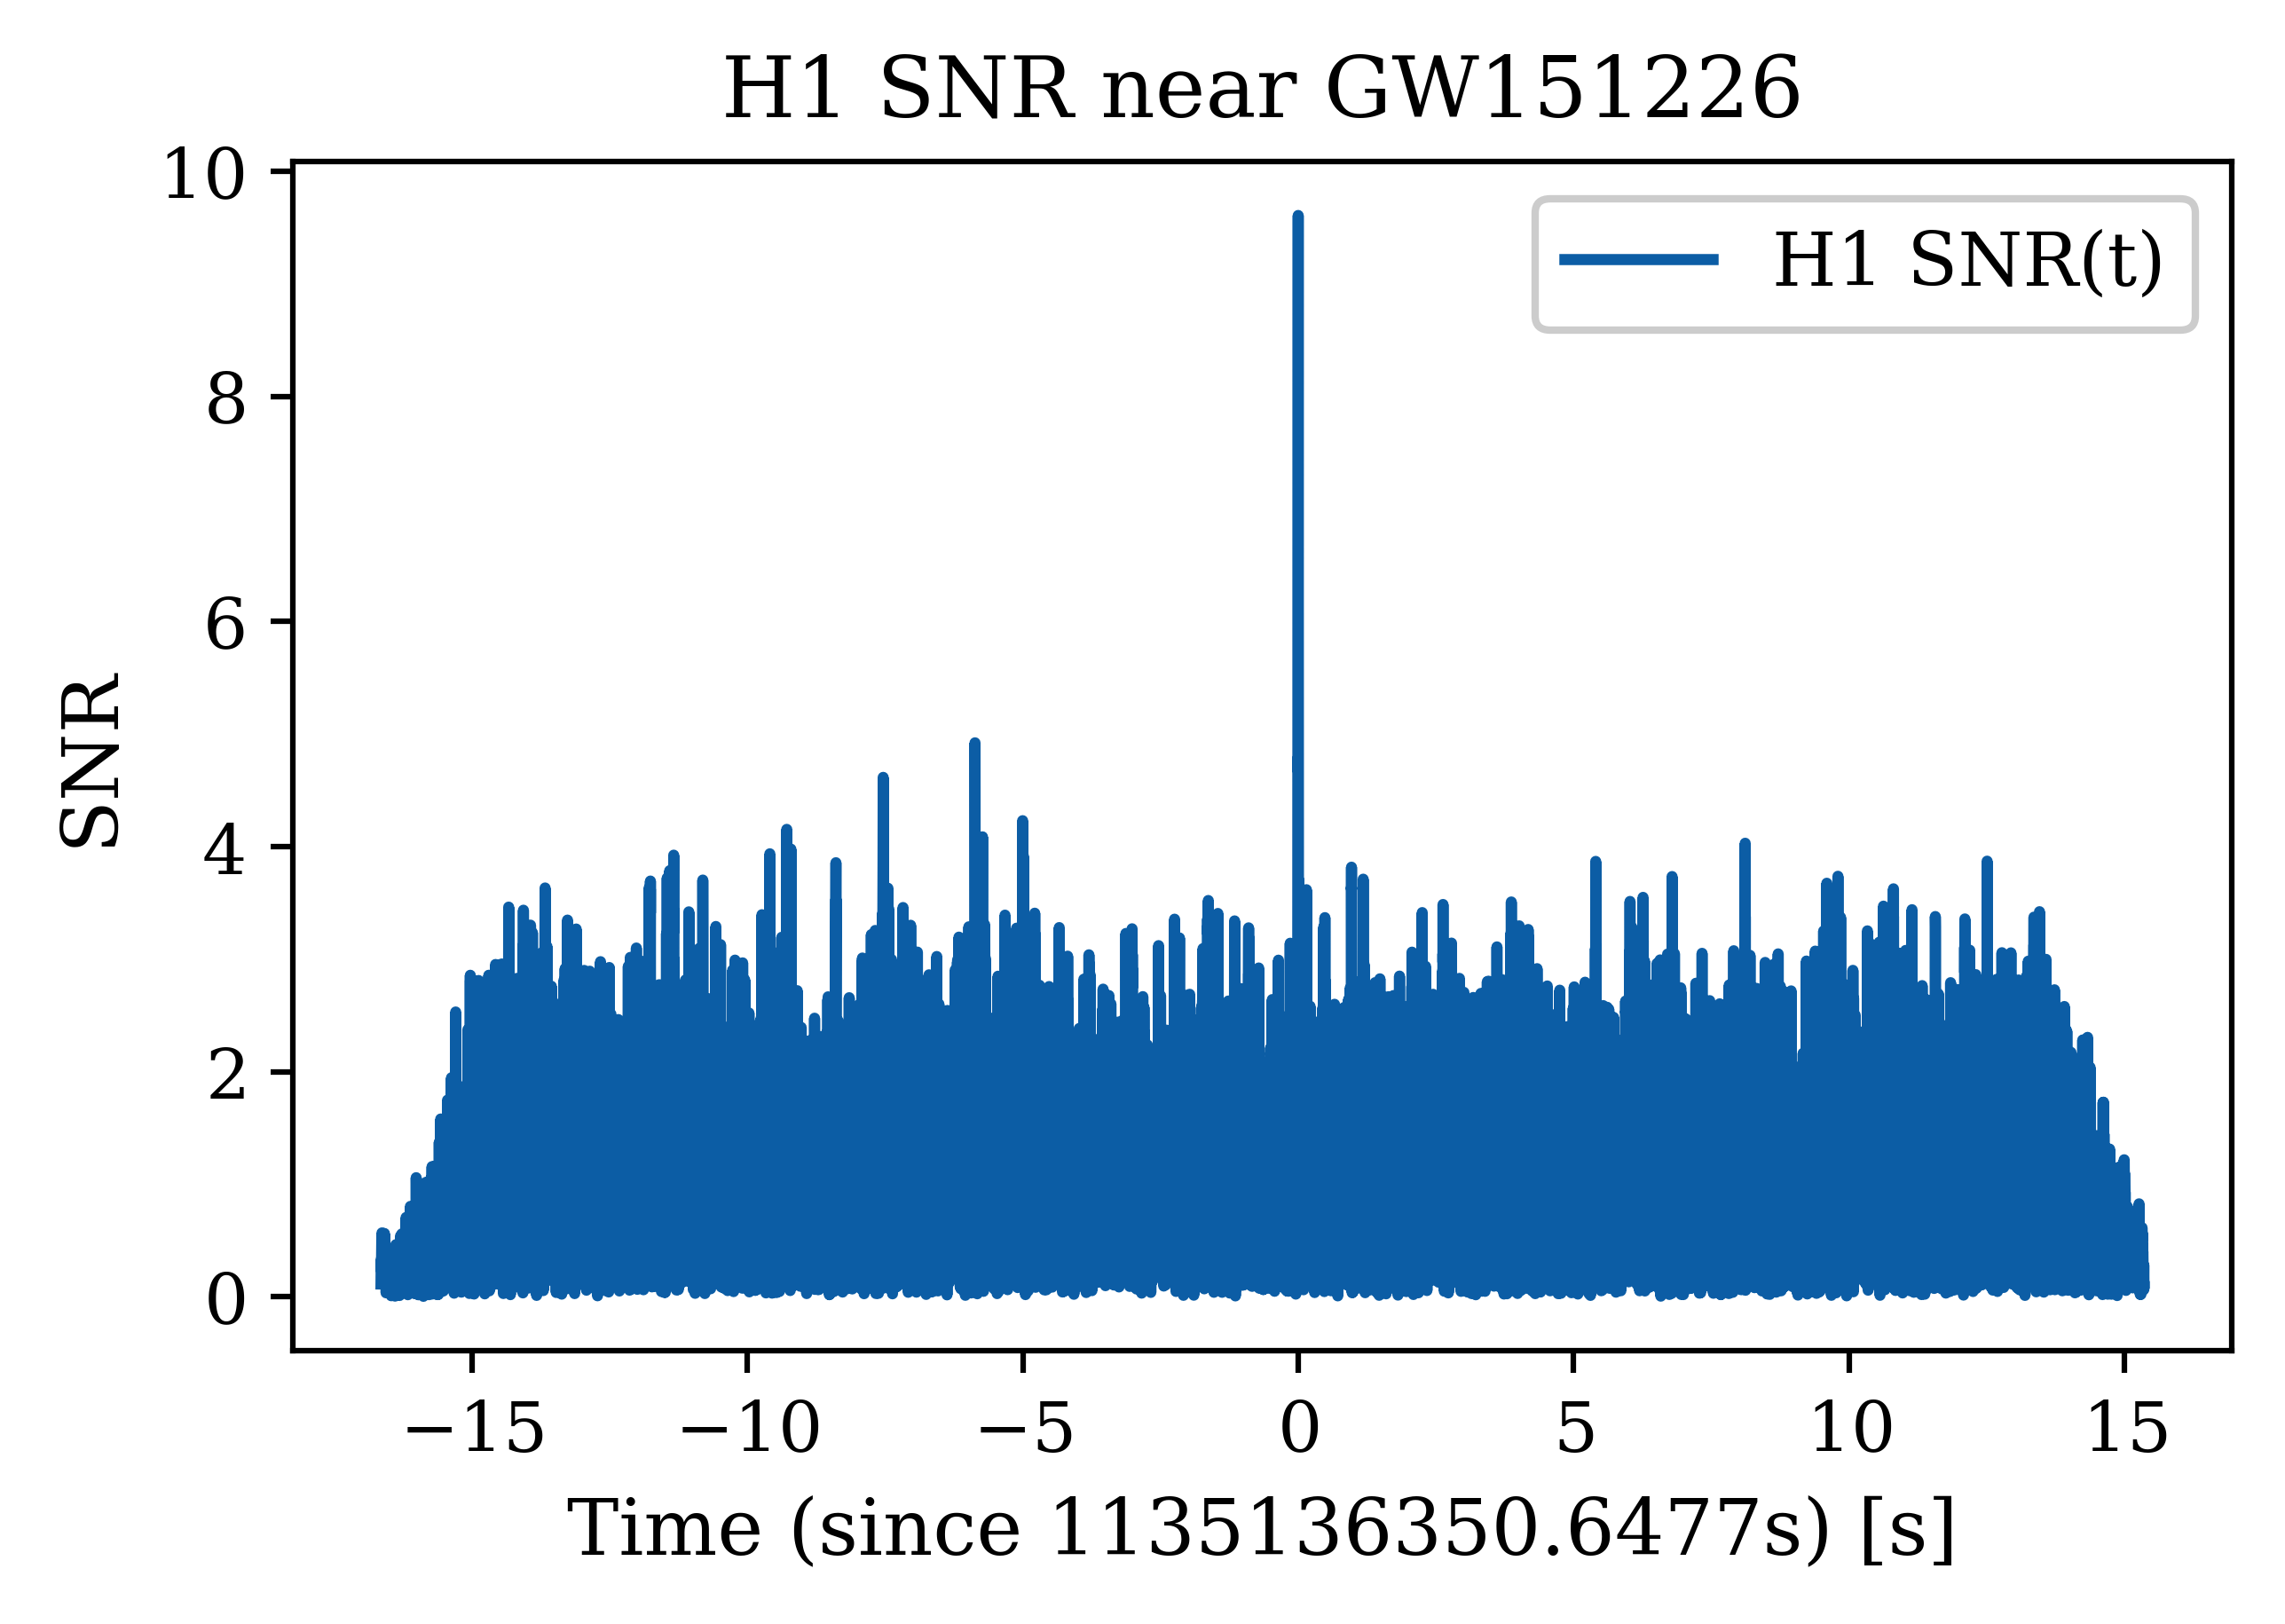

<Figure size 1410x870 with 0 Axes>

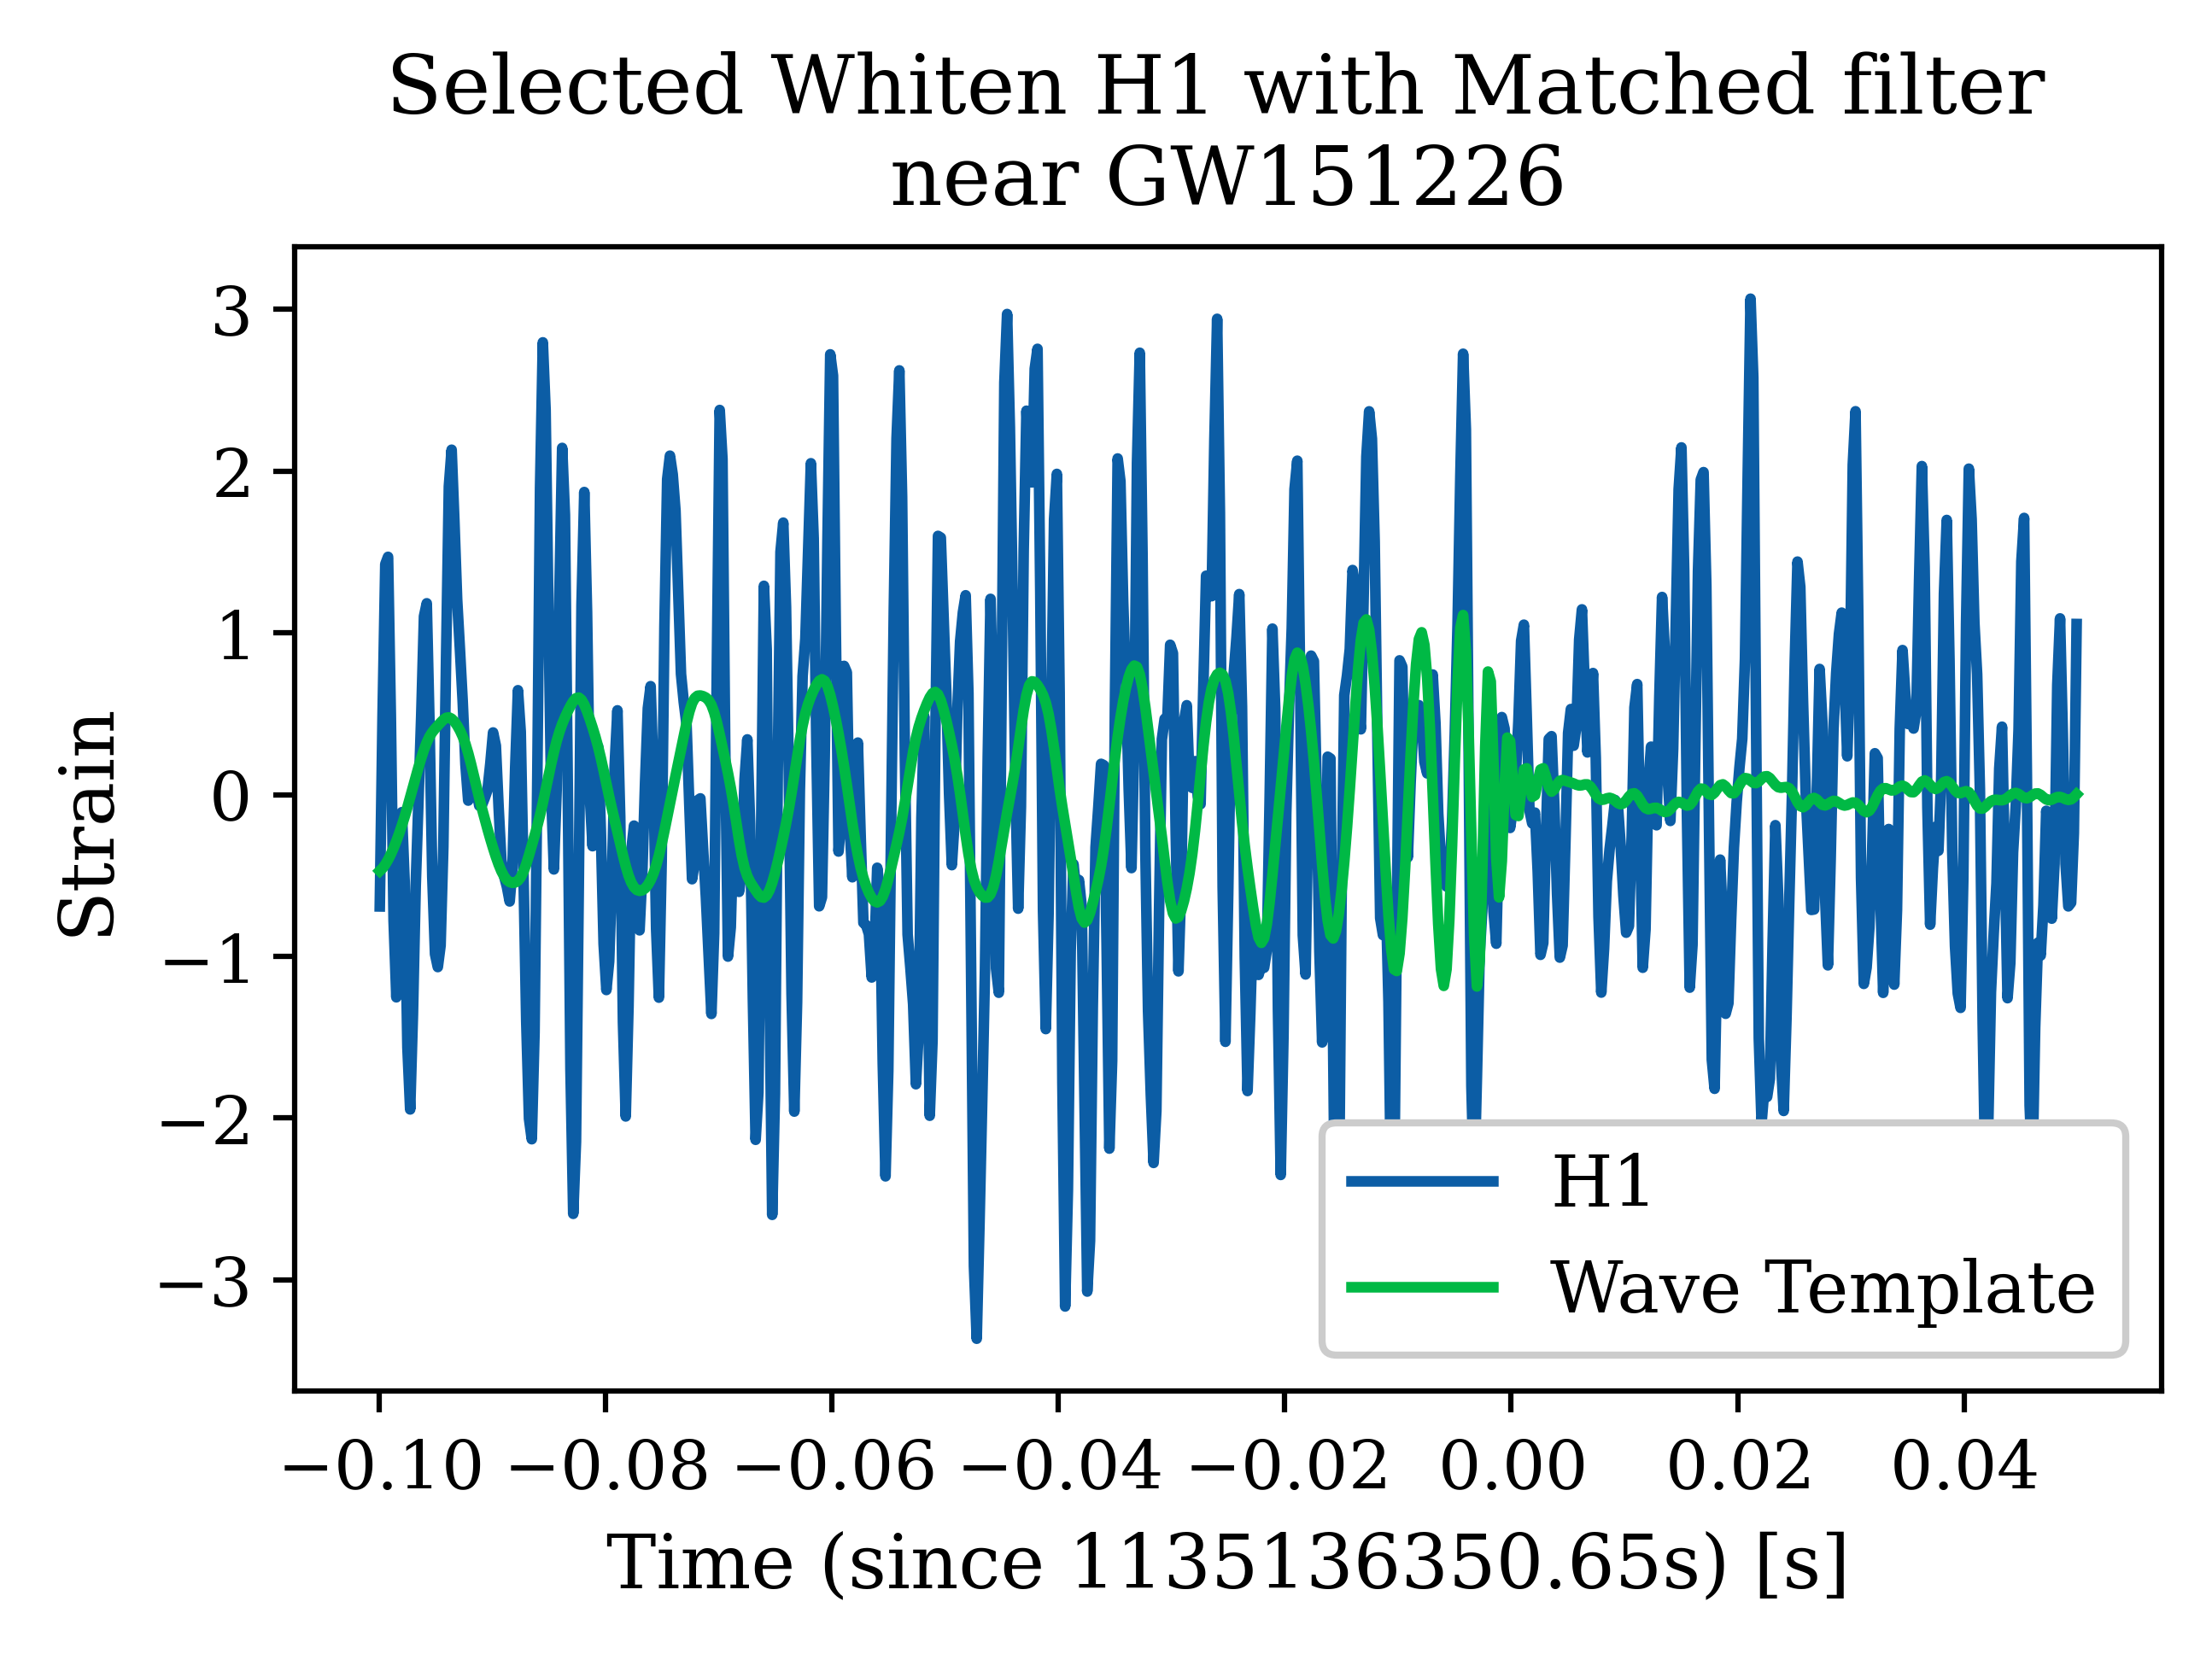

GW151226: For detector L1, maximum at 1135136350.6465 with SNR = 7.2, D_eff = 683.64, horizon = 614.8 Mpc


<Figure size 1410x870 with 0 Axes>

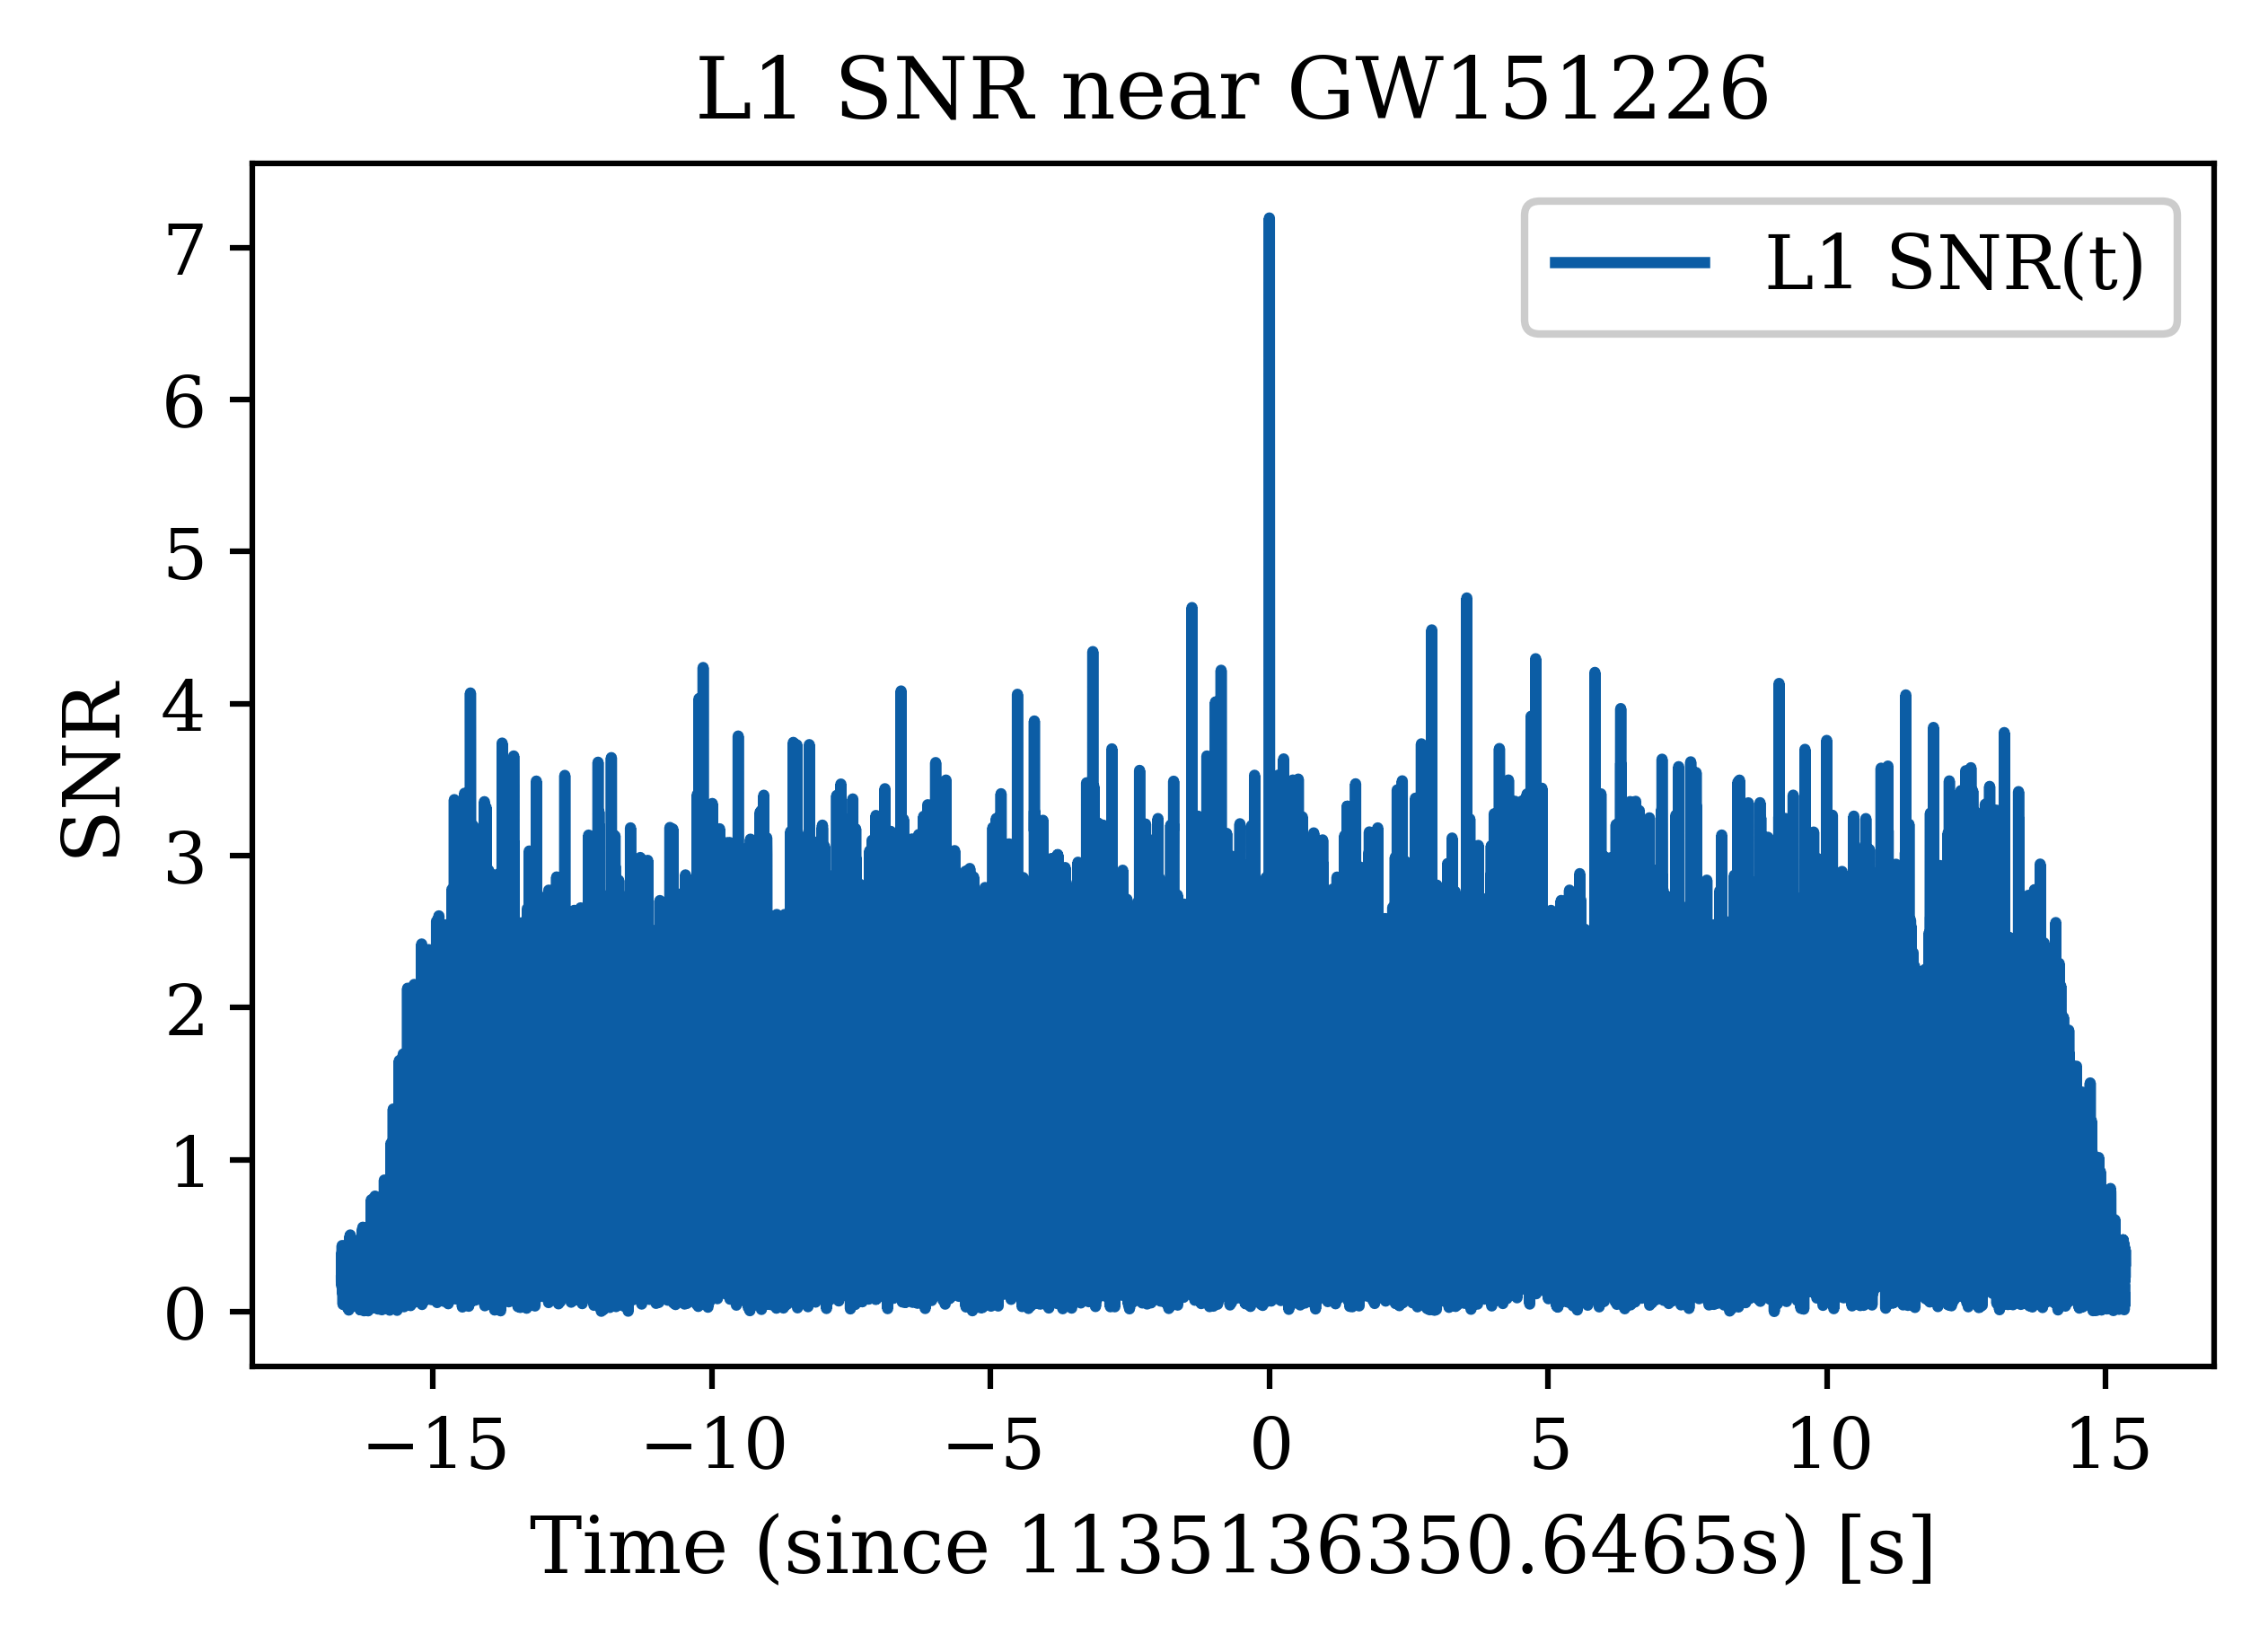

<Figure size 1410x870 with 0 Axes>

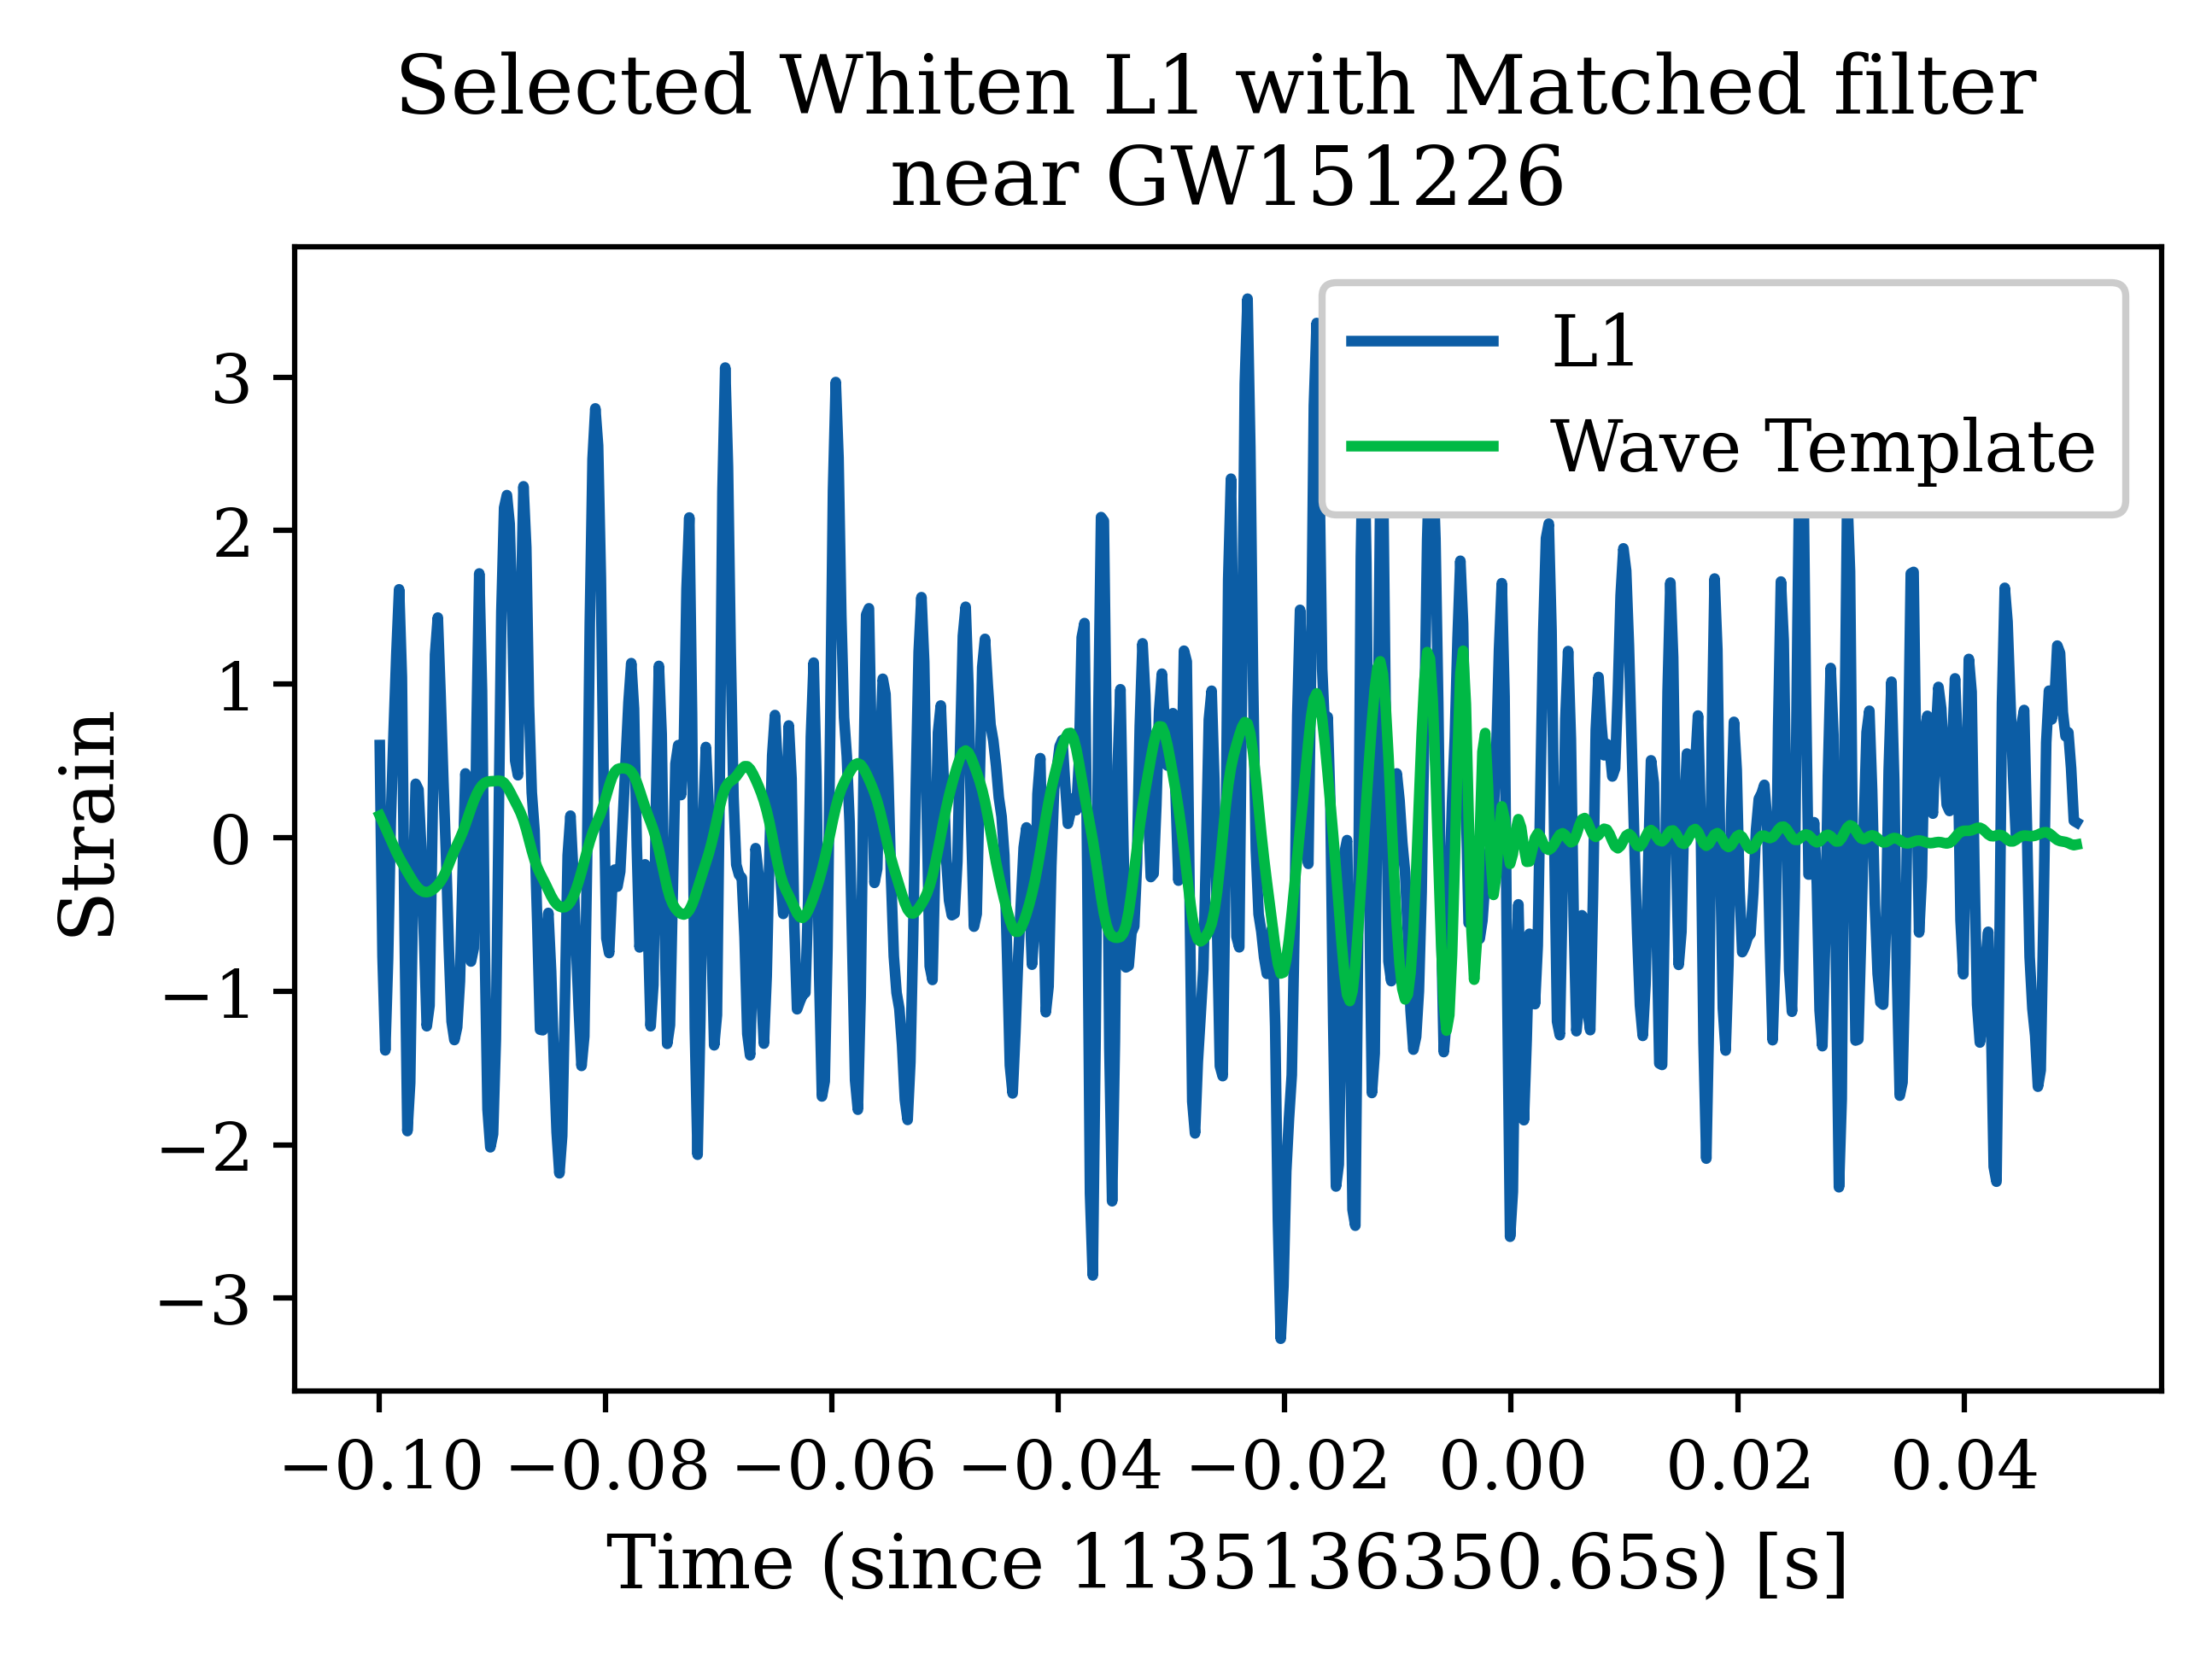

GW151226: The score is 0.510975.
Time score: 1.000000
cSNR score: 0.220524
Params score: 0.493617
GW170104: For detector H1, maximum at 1167559936.6084 with SNR = 7.8, D_eff = 1580.71, horizon = 1548.3 Mpc


<Figure size 1410x870 with 0 Axes>

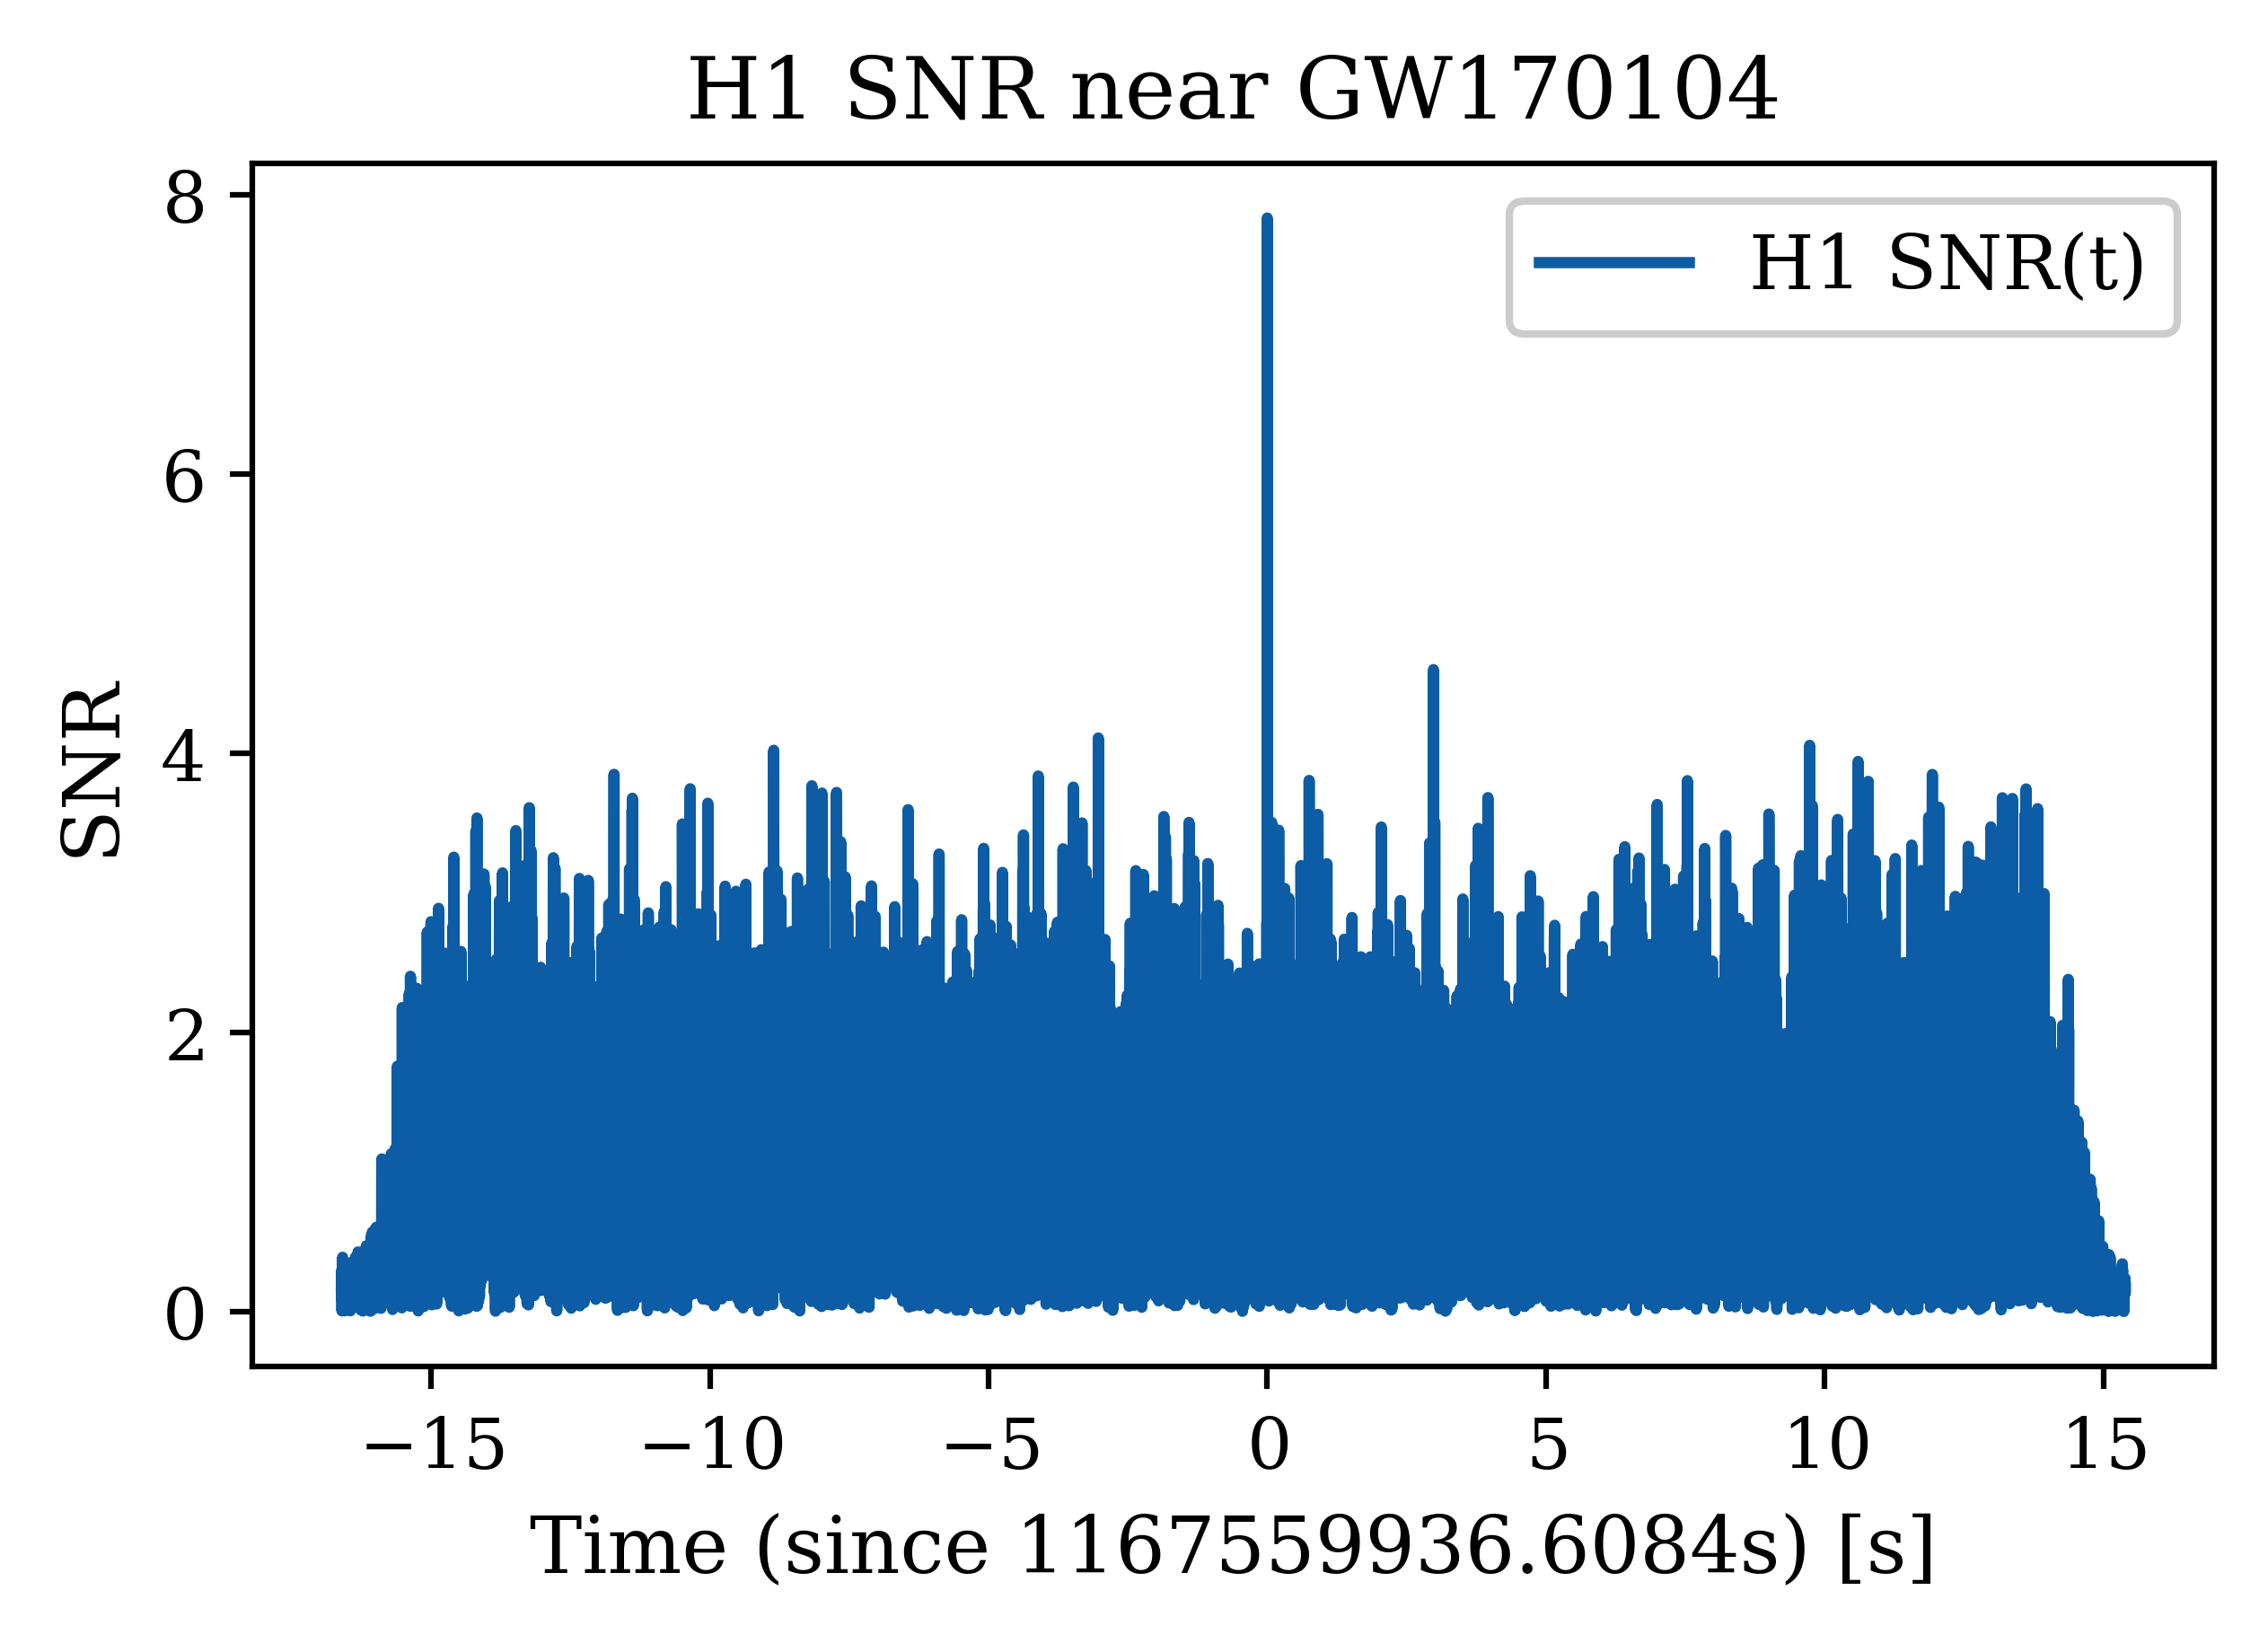

<Figure size 1410x870 with 0 Axes>

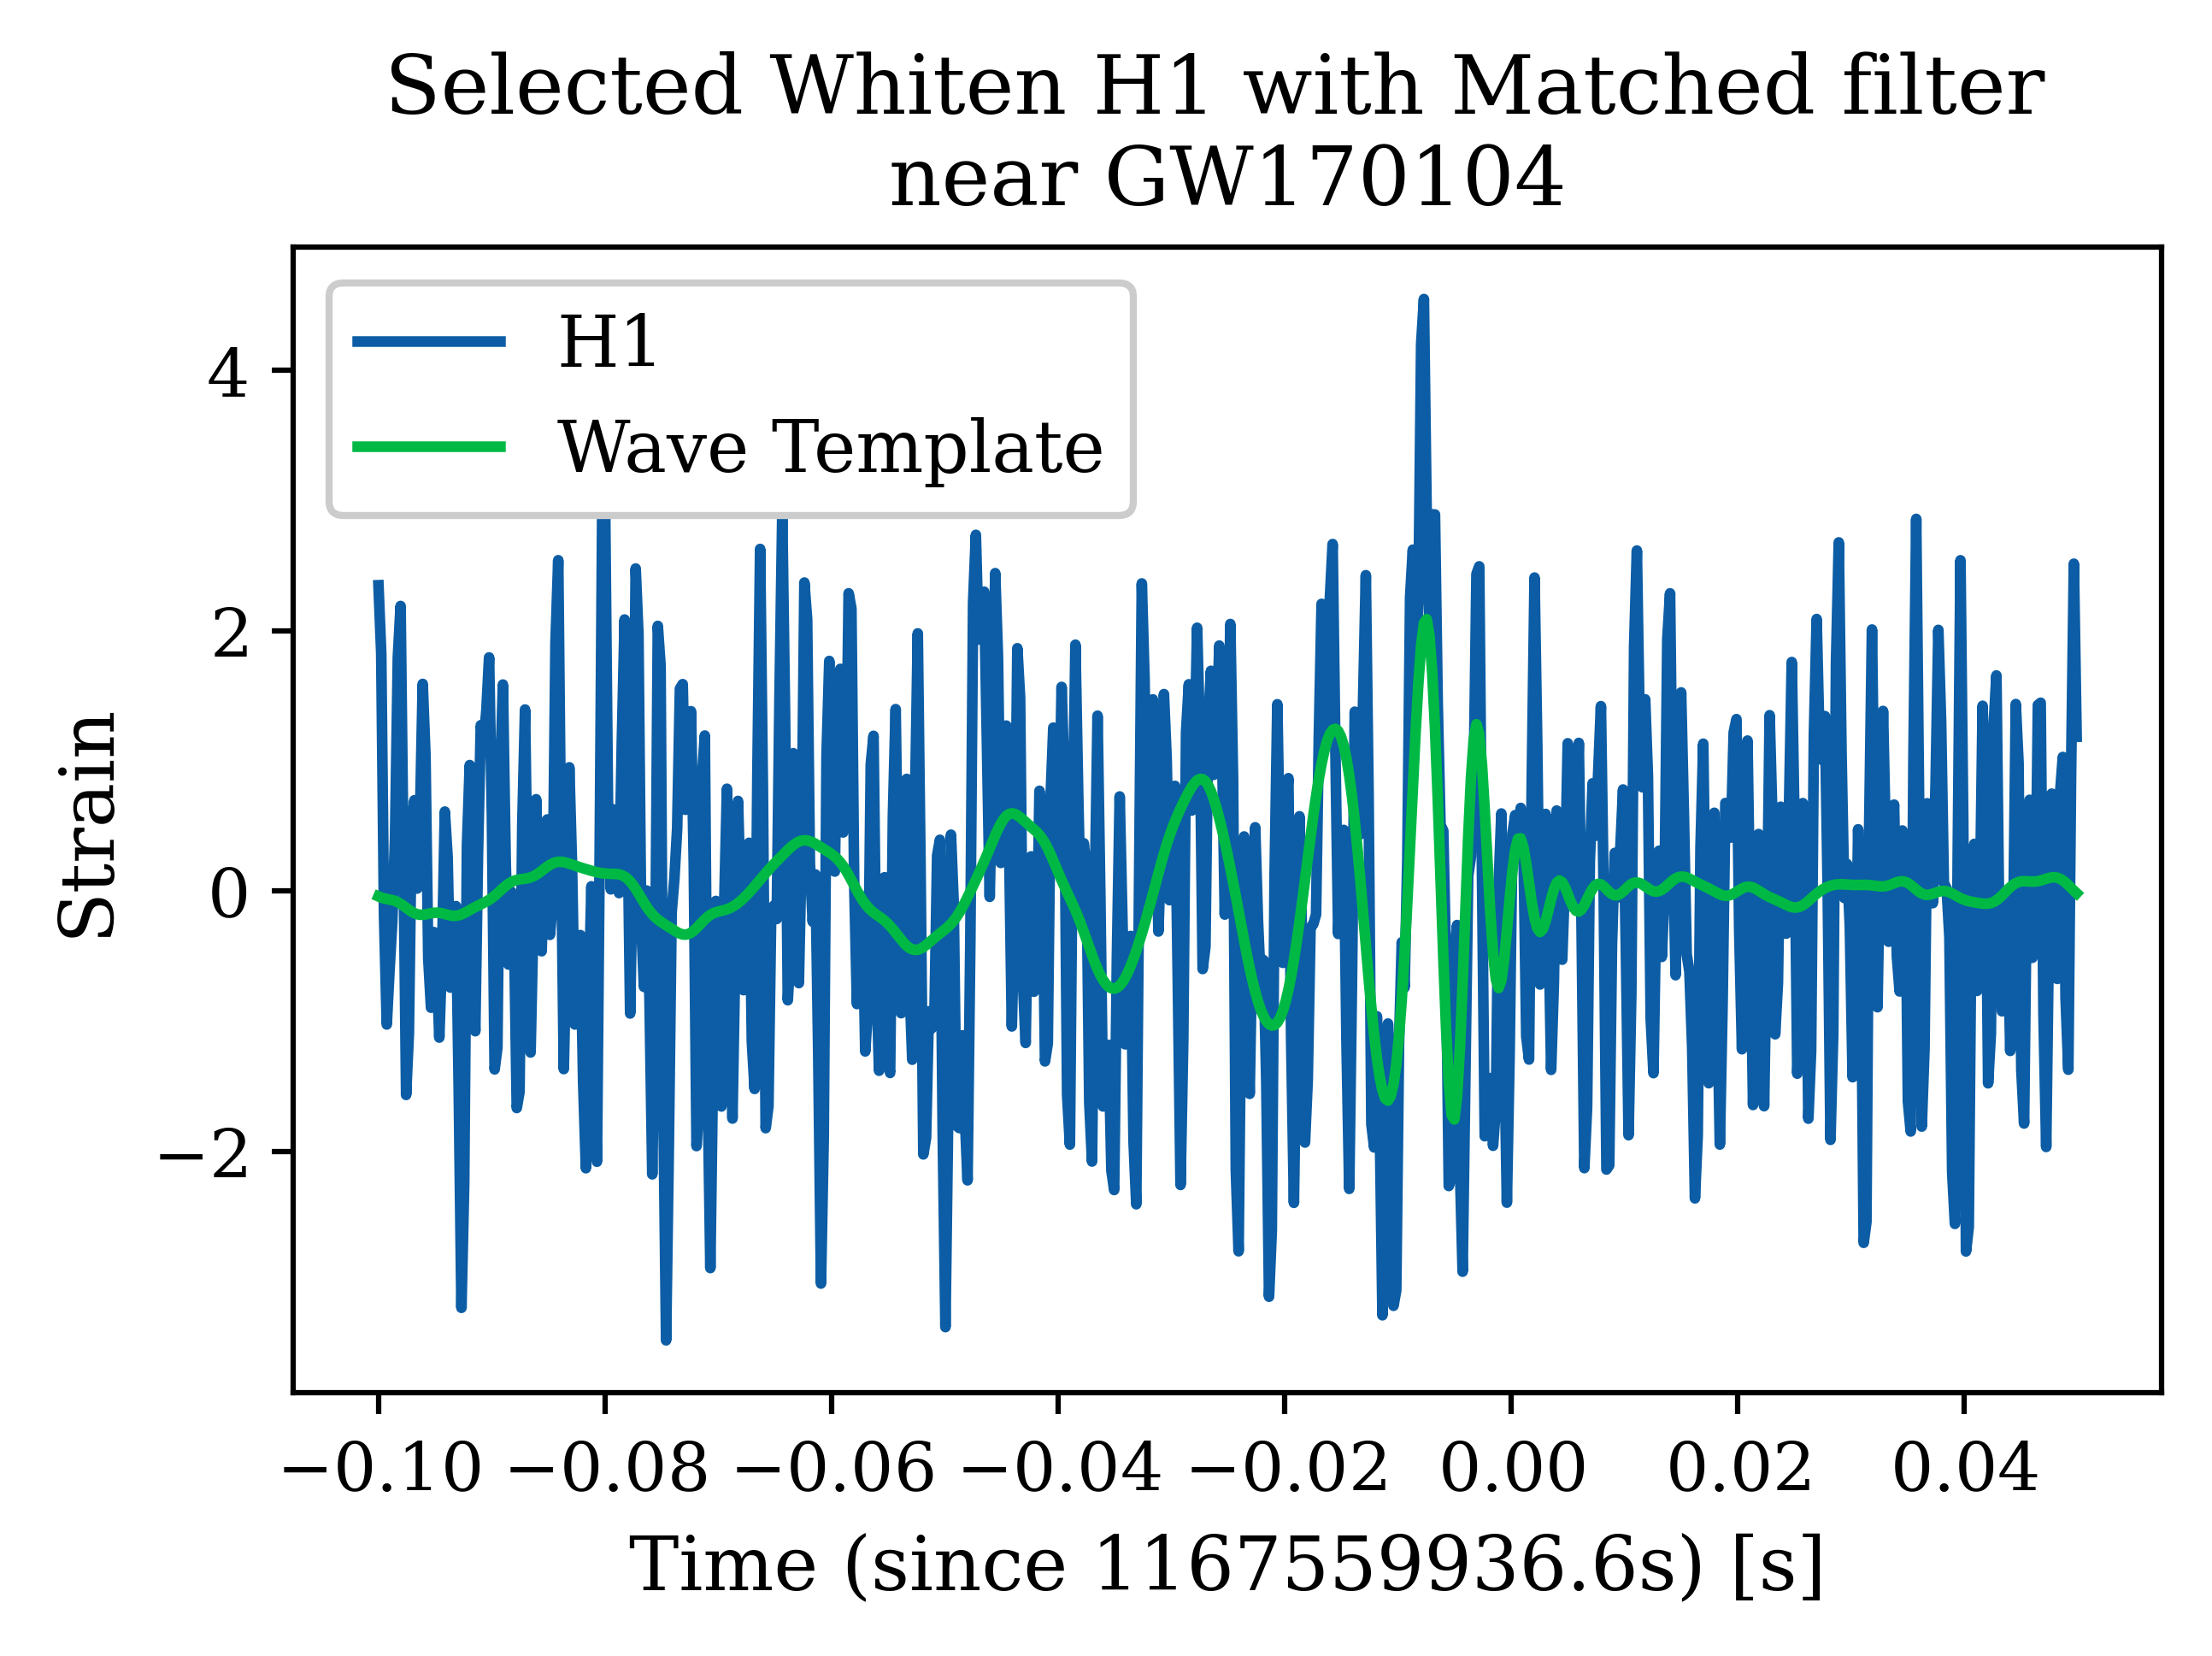

GW170104: For detector L1, maximum at 1167559936.6113 with SNR = 9.5, D_eff = 1674.23, horizon = 1998.2 Mpc


<Figure size 1410x870 with 0 Axes>

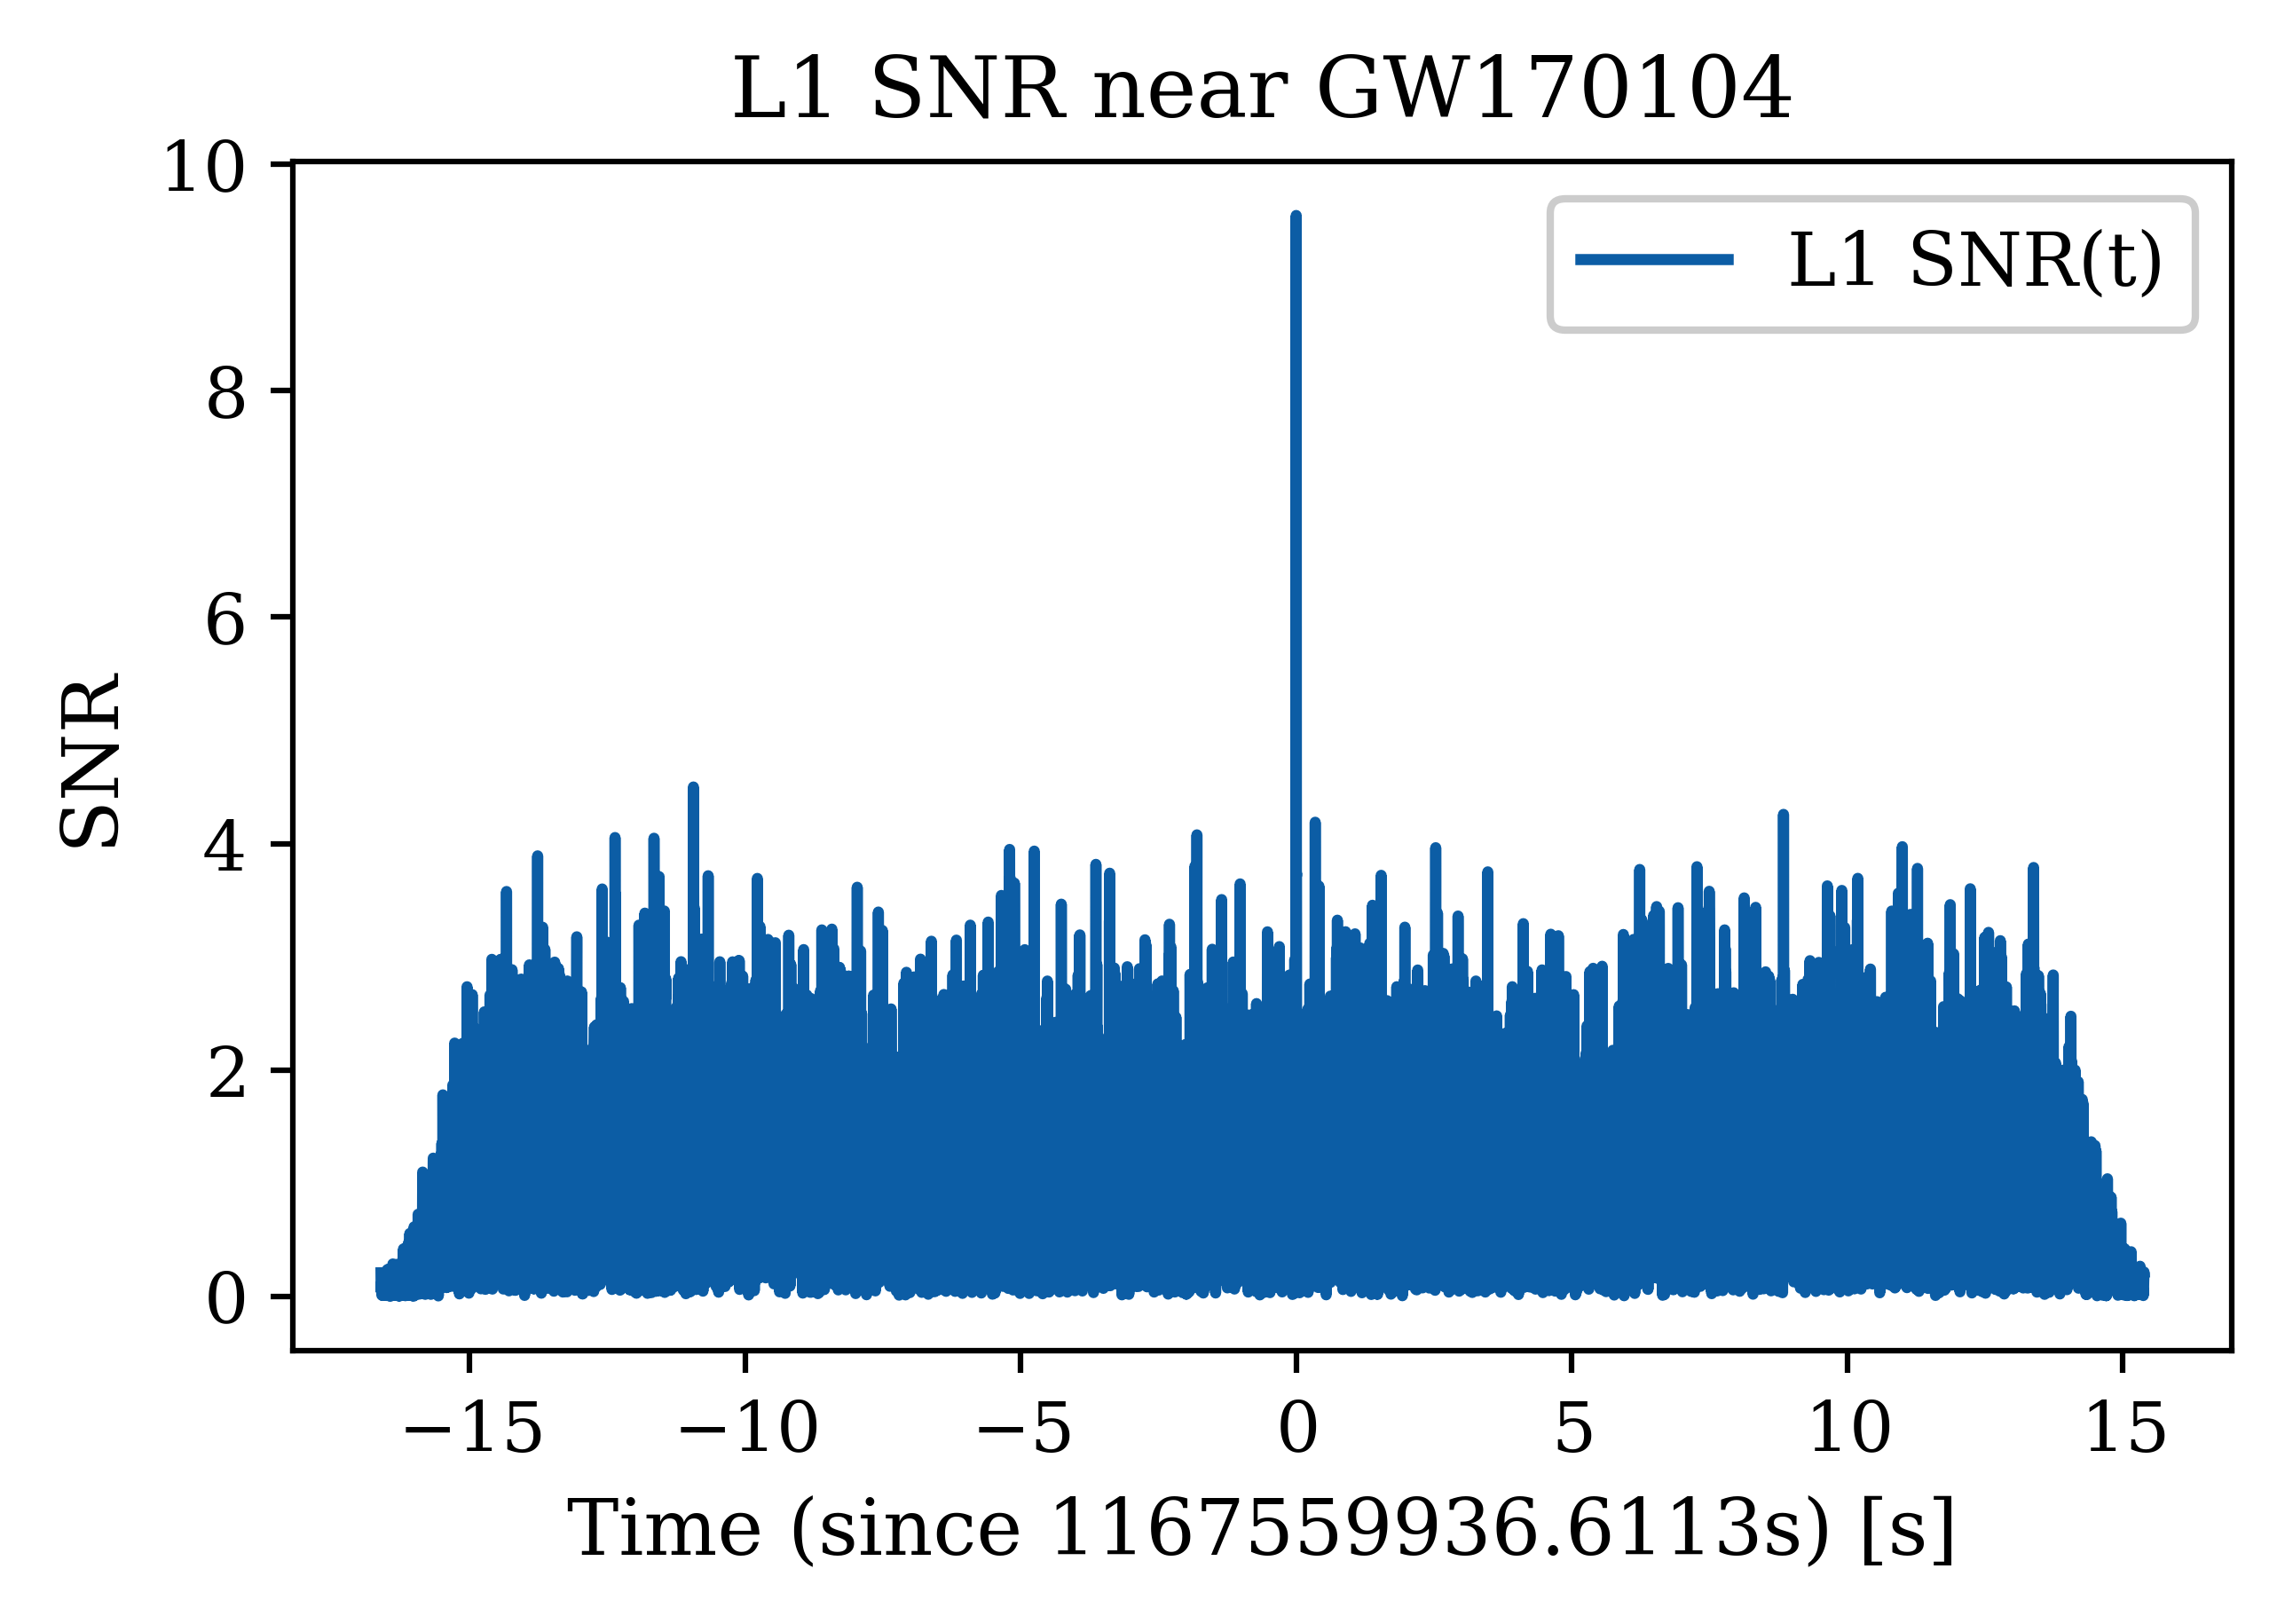

<Figure size 1410x870 with 0 Axes>

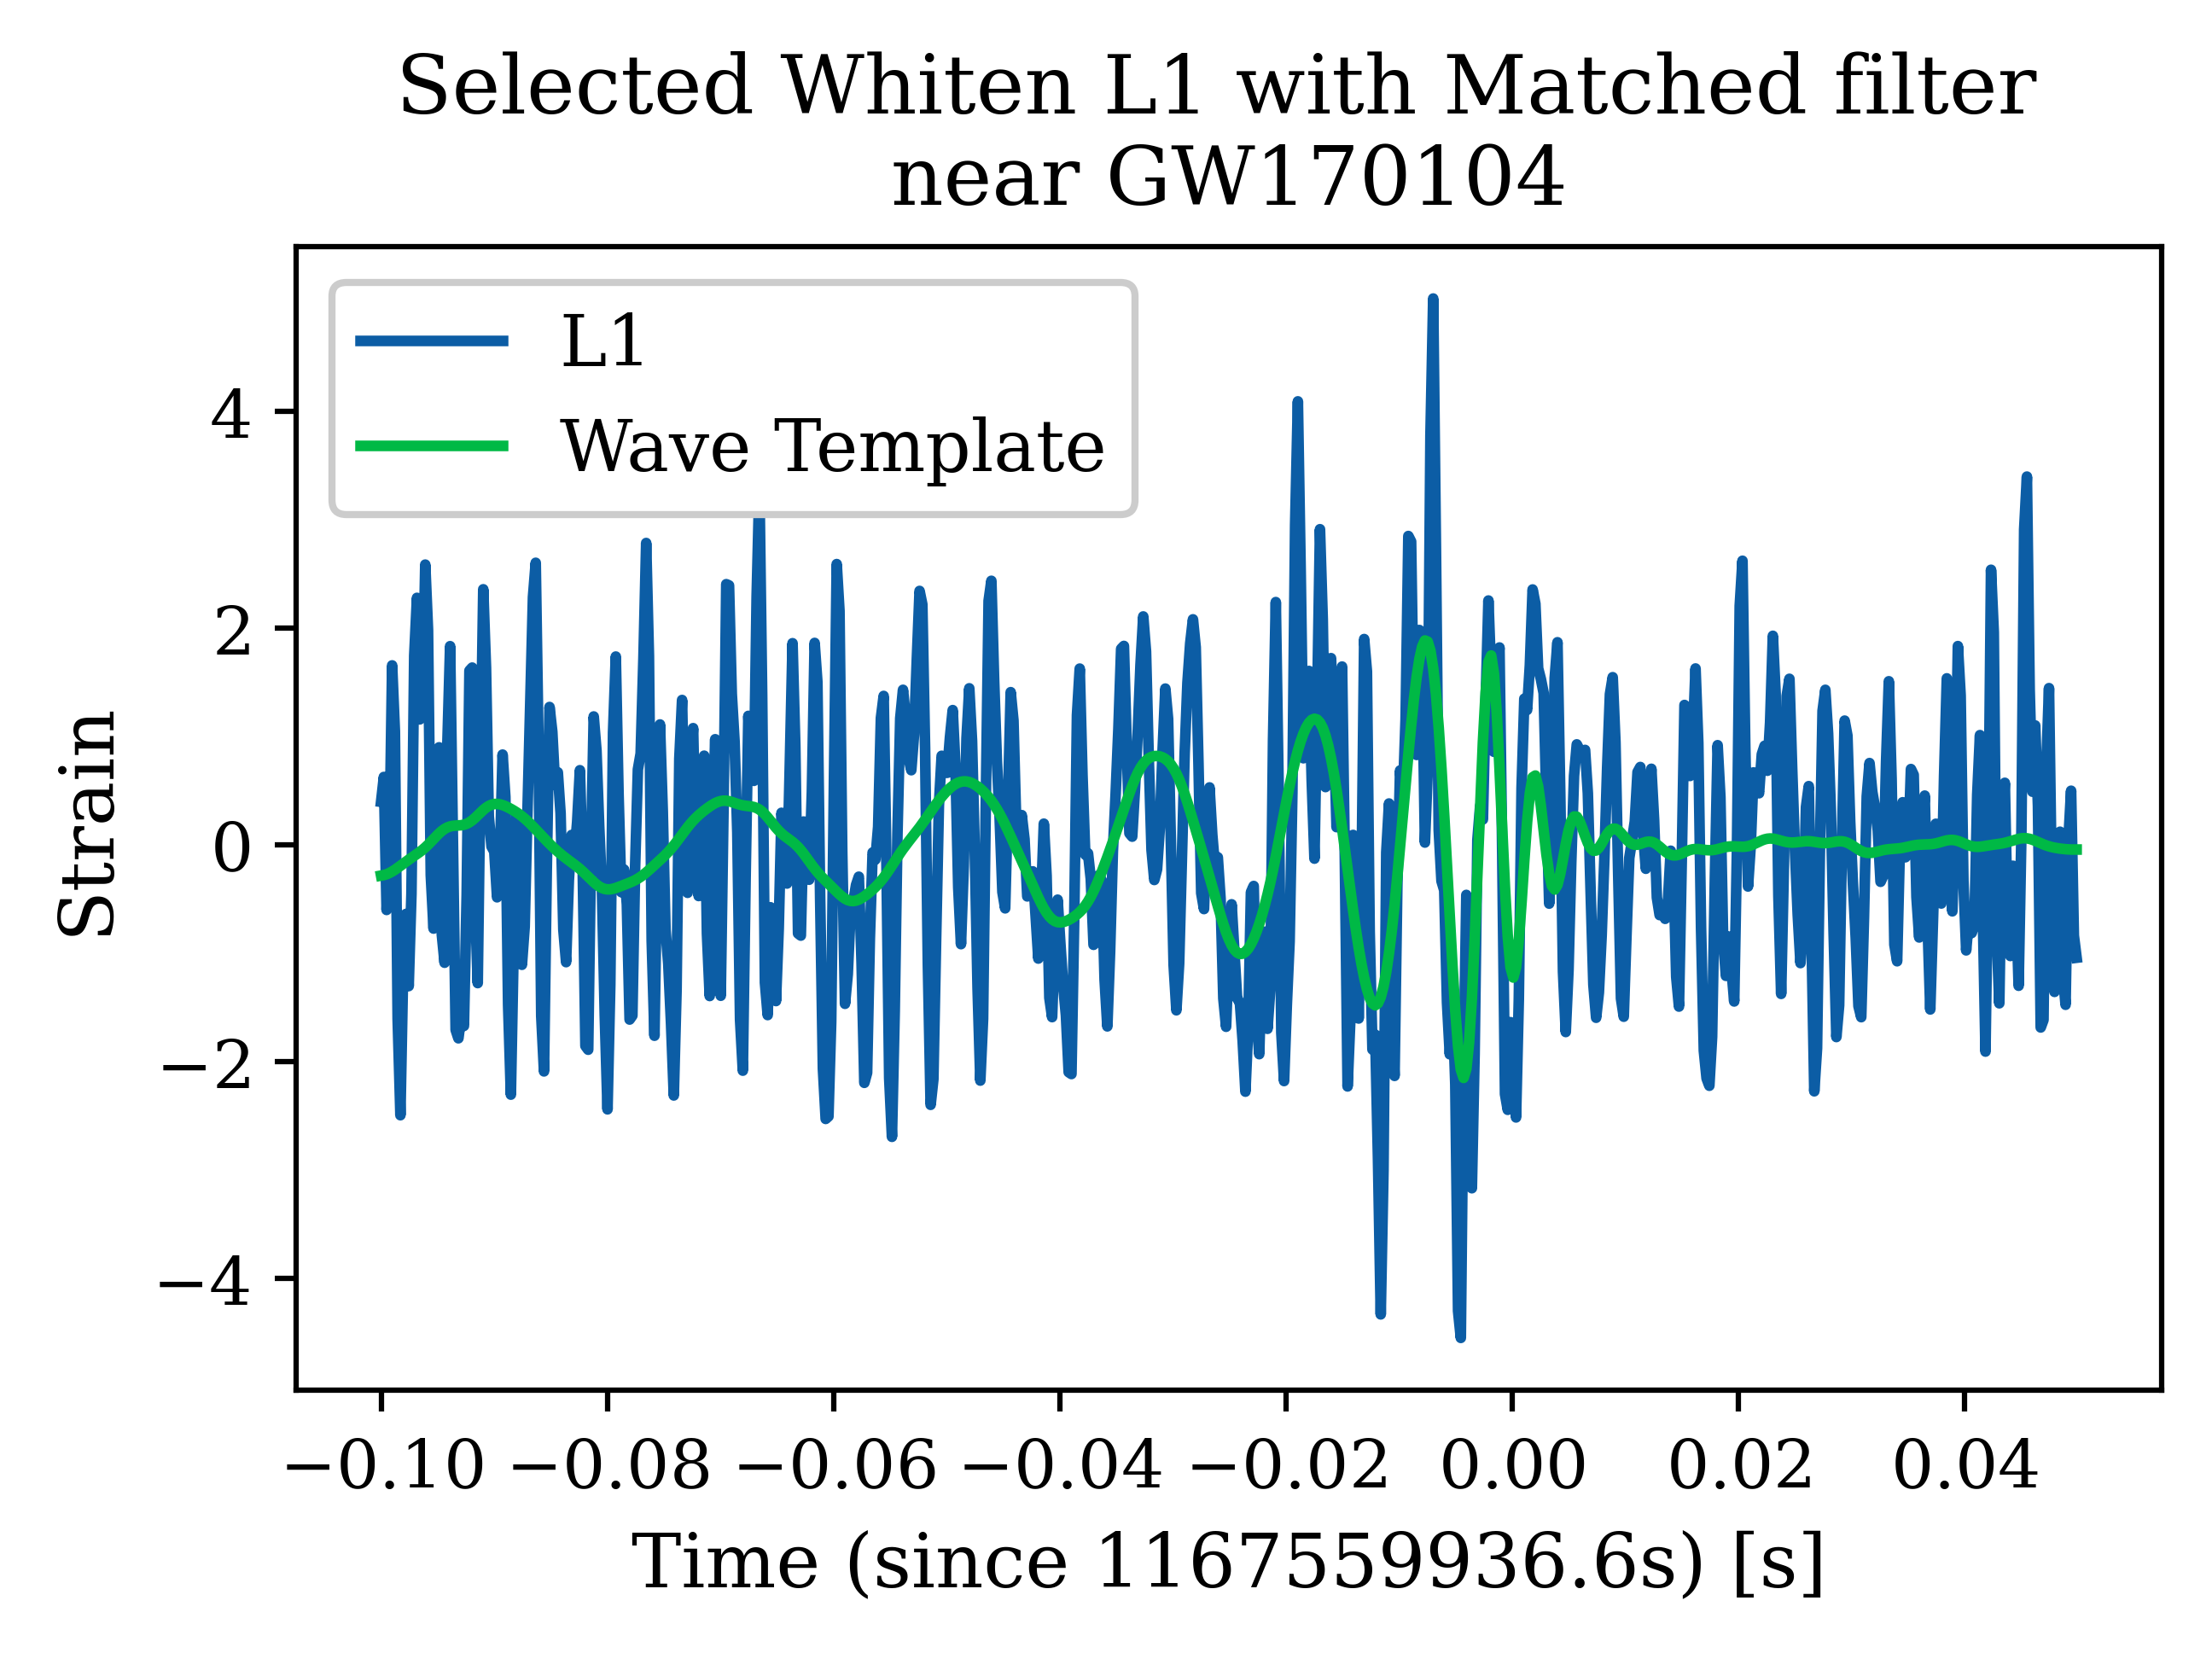

GW170104: The score is 0.608212.
Time score: 1.000000
cSNR score: 0.468215
Params score: 0.488361


In [2]:
if __name__ == "__main__":
    json_file_path = 'ysy_BBH_events_v3.json'
    
    try:
        with open(json_file_path, 'r') as f:
            all_events_data = json.load(f)
            
        # 遍历JSON文件中的每一个事件并进行处理
        for event_name, event_info in all_events_data.items():
            # 确保 'name' 键存在，如果不存在则使用字典的键
            if 'name' not in event_info:
                event_info['name'] = event_name
            mf_result = ygdu.matched_filtering_main_2(event_info)
            cSNR = ygdu.caculate_coherent_snr(event_info)
            score = ygdu.detector_consistency_check(mf_result, cSNR, detail=True)
            print(event_name+': The score is {:4f}.'.format(score[0]))
            print('Time score: {:4f}'.format(score[1]))
            print('cSNR score: {:4f}'.format(score[2]))
            print('Params score: {:4f}'.format(score[3]))
            print('============================================')

    except FileNotFoundError:
        print(f"错误: JSON文件 '{json_file_path}' 未找到。请确保文件存在于正确的路径。")
    except Exception as e:
        print(f"处理过程中发生错误: {e}")